# <span style="color:green">Travel Package Purchase Prediction</span>

### Description

#### Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, it was difficult to identify the potential customers because customers were contacted at random without looking at the available information.


The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

This time company wants to harness the available data of existing and potential customers to target the right customers. This will require analyzing the customers' data and information to provide recommendations to the Policy Maker and build a model to predict the potential customer who is going to purchase the newly introduced travel package. The model will be built to make predictions before a customer is contacted.

### Objective

To predict which customer is more likely to purchase the newly introduced travel package.

## Data Dictionary

#### Customer details:

- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

#### Customer interaction data: 

- PitchSatisfactionScore: Sales pitch satisfaction score
- ProductPitched: Product pitched by the salesperson
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- DurationOfPitch: Duration of the pitch by a salesperson to the customer

### Key Questions
1. What are the different customer profiles that exist today?
2. What are the demographic and purchase patterns of these customers?
3. Which customer is more likely to purchase the newly introduced travel package?

### Key Assumptions
1. The dataset does not indicate the period this data was collected. It could have pre,post or during covid. And each of these periods had significant impacts on travel patterns and preferences.  
2. The dataset indicates the number of trips made by the customer, whether it was domestic or international. It could have helped in making healthier assumptions when fixing missing values. For ex: if the customer makes more domestic trips, it is possible s/he could have made 10-12 a year whereas, international trips may not be a very high number. 
3. The dataset is very lean in the knowledge of customer preferences and does not say anything about the budget.
4. We are assuming that the Product Pitched is the same as product purchased eventually, and that only 1 product is pitched to the customer. 
5. We do not the country or regions from where the data was collected, which could have helped us to make strong inferences when analysing the Monthly Income variables and its outliers. 

### Categorizing data
We can further categorize the variables provided in the manner below, to help us with EDA and other analyses. 

Customers details can be further split as demographic details and trip details. With that split, we can have the following groups of data 

##### Demographic details:

- CustomerID: Unique customer ID
- Age: Age of customer
- Designation: Designation of the customer in the current organization
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.
- Occupation: Occupation of customer
- Gender: Gender of customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- MaritalStatus: Marital status of customer
- MonthlyIncome: Gross monthly income of the customer

##### Trip Details
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- NumberOfTrips: Average number of trips in a year by customer
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer

##### Customer interaction data: 

- PitchSatisfactionScore: Sales pitch satisfaction score
- ProductPitched: Product pitched by the salesperson
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- DurationOfPitch: Duration of the pitch by a salesperson to the customer

##### Variable of Interest
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)


## Import necessary libraries


In [1]:
# to make Python code more structured
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

# for feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression


# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)
from sklearn.model_selection import GridSearchCV


# library to import XGB classifier
from xgboost import XGBClassifier

<IPython.core.display.Javascript object>

### Loading the dataset

Since the file is in an excel sheet, we will use pd.read_excel to load it as a dictionary first.

In [2]:
dict_tourism = pd.read_excel("Tourism.xlsx", sheet_name=["Tourism"])
data = dict_tourism.get("Tourism")

<IPython.core.display.Javascript object>

### Overview of the dataset

### Displaying the first and last 5 rows of the dataset

In [3]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


<IPython.core.display.Javascript object>

In [4]:
data.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


<IPython.core.display.Javascript object>

### Shape of the dataset

In [5]:
data.shape

(4888, 20)

<IPython.core.display.Javascript object>

### Summary of the dataset

In [6]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,NaN,NaN,NaN,202443.5,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,NaN,NaN,NaN,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,NaN,NaN,NaN,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
TypeofContact,4863,2,Self Enquiry,3444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,4888.0,NaN,NaN,NaN,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4637.0,NaN,NaN,NaN,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
Occupation,4888,4,Salaried,2368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4888,3,Male,2916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,4888.0,NaN,NaN,NaN,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,NaN,NaN,NaN,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0


<IPython.core.display.Javascript object>

### Check the datatypes of the columns of the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

<IPython.core.display.Javascript object>

##### <span style="color:green">Observations</span>
1. There are 4888 rows with 20 columns, including the variable of interest. 
2. There are 8 columns with missing values. 
3. Certain fields are now maintained as int / float, which needs to be converted to category, for meaningful EDA. Example: OwnCar, Passport. This is because having numbers in these columns do not indicate orders or hierarchy or quantity, but instead they indicate categories (like have passport or not). 

#### Dropping Customer ID

Since Customer ID is an unique value that identifies each customer, we can drop this column as it is not needed for our analyses.

In [8]:
data.drop("CustomerID", axis=1, inplace=True)

<IPython.core.display.Javascript object>

#### Duplicate Rows

Since we have dropped Customer ID, it is now ideal to check for duplicated rows because having Customer IDs are unique and would have prevented us from finding true duplicates. 

In [9]:
# print the number of duplicated rows
print("Number of duplicated rows: ", data[data.duplicated()].shape[0])

# let's isolate the duplicated rows and verify they are indeed duplicates before dropping them
# keep = False will get all the duplicate items without eliminating duplicate rows.
# we can sort by the Monthly Income in order to isolate any two rows which are duplicates and compare

data[data.duplicated(keep=False)].sort_values("MonthlyIncome").head(10)

Number of duplicated rows:  141


,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1971,0,30.0,Company Invited,1,9.0,Small Business,Female,3,3.0,Basic,3.0,Married,2.0,0,3,1,1.0,Executive,17083.0
501,0,30.0,Company Invited,1,9.0,Small Business,Female,3,3.0,Basic,3.0,Married,2.0,0,3,1,1.0,Executive,17083.0
1642,0,36.0,Company Invited,1,9.0,Small Business,Male,1,3.0,Basic,4.0,Single,5.0,0,4,1,0.0,Executive,17088.0
172,0,36.0,Company Invited,1,9.0,Small Business,Male,1,3.0,Basic,4.0,Single,5.0,0,4,1,0.0,Executive,17088.0
1732,0,32.0,Self Enquiry,1,8.0,Large Business,Male,2,4.0,Deluxe,5.0,Single,5.0,0,4,0,1.0,Manager,17176.0
262,0,32.0,Self Enquiry,1,8.0,Large Business,Male,2,4.0,Deluxe,5.0,Single,5.0,0,4,0,1.0,Manager,17176.0
2125,0,33.0,Self Enquiry,2,9.0,Salaried,Male,2,3.0,Basic,4.0,Married,4.0,1,5,0,1.0,Executive,17277.0
655,0,33.0,Self Enquiry,2,9.0,Salaried,Male,2,3.0,Basic,4.0,Married,4.0,1,5,0,1.0,Executive,17277.0
153,0,45.0,Self Enquiry,1,15.0,Salaried,Male,2,3.0,Deluxe,4.0,Married,1.0,0,4,1,0.0,Manager,17348.0
1623,0,45.0,Self Enquiry,1,15.0,Salaried,Male,2,3.0,Deluxe,4.0,Married,1.0,0,4,1,0.0,Manager,17348.0


<IPython.core.display.Javascript object>

In [10]:
# we have verified the duplicates and it would be best to drop such rows
data.drop_duplicates(inplace=True)

# number of rows remaining in the dataset after duplicate removal
data.shape[0]

4747

<IPython.core.display.Javascript object>

In [11]:
# verifying after dropping
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4747 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4747 non-null   int64  
 1   Age                       4531 non-null   float64
 2   TypeofContact             4722 non-null   object 
 3   CityTier                  4747 non-null   int64  
 4   DurationOfPitch           4501 non-null   float64
 5   Occupation                4747 non-null   object 
 6   Gender                    4747 non-null   object 
 7   NumberOfPersonVisiting    4747 non-null   int64  
 8   NumberOfFollowups         4703 non-null   float64
 9   ProductPitched            4747 non-null   object 
 10  PreferredPropertyStar     4721 non-null   float64
 11  MaritalStatus             4747 non-null   object 
 12  NumberOfTrips             4609 non-null   float64
 13  Passport                  4747 non-null   int64  
 14  PitchSat

<IPython.core.display.Javascript object>

##### <span style="color:green">Observations</span>

1. Customer ID was dropped since it is only used to uniquely identify a customer and wouldn't contribute meaningfully to our analyses. 
2. After dropping Customer ID, the dataset was checked for duplicates. 141 rows were identified and verified as duplicated. These rows were dropped. 
3. 4747 rows remain in the dataset, with 19 columns.

### Missing Value Treatments

In [12]:
# checking which columns have null values
data.isnull().sum().sort_values(ascending=False)

DurationOfPitch             246
MonthlyIncome               224
Age                         216
NumberOfTrips               138
NumberOfChildrenVisiting     60
NumberOfFollowups            44
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
ProdTaken                     0
MaritalStatus                 0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

<IPython.core.display.Javascript object>

In order to impute missing values, let's see if there are any meaningful correlations between variables with missing values and those without.

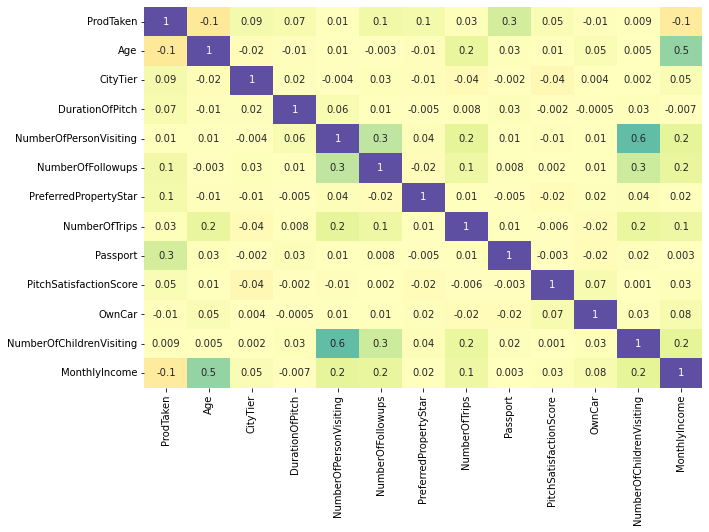

<IPython.core.display.Javascript object>

In [13]:
# plotting the correlation heatmap

plt.figure(figsize=(10, 7))
sns.heatmap(
    data.corr(), annot=True, vmin=-1, vmax=1, fmt=".1g", cmap="Spectral", cbar=False,
)
plt.show()

##### <span style="color:green">Observations</span>
1.  There are 8 columns with missing values, their data types are also given alongwith:
- DurationOfPitch (float64)
- MonthlyIncome (float64)              
- Age (float64)                         
- NumberOfTrips (float64)              
- NumberOfChildrenVisiting (float64)    
- NumberOfFollowups (float64)         
- PreferredPropertyStar (float64)        
- TypeofContact (object)

2. MonthlyIncome has a strong correlation with Age (0.5). However, both these variables have missing values. 
3. NumberOfChildrenVisiting has a high correlation with NumberOfPersonVisiting (0.6). We can use this information to impute missing values.
4. The remaining variables do not seem to have a high correlation with the others. 

#### <span style="color:purple">Steps to treat missing values</span>

Given that variables do not have very strong correlations, we can take a few measures to impute missing values.

- Designation can be a good indicator of **Monthly Income** and **Age**. We can use Designation to group and fill the null values with median of the group. 
- **Duration of Pitch** can depend on the Product that was pitched and whether it was taken or not. We can group by ProductPitched and ProdTaken and fill the null values by median of the group. 
- We have seen **Number of Children Visiting** is strongly correlated to Number of Persons Visiting. Therefore, we can group by NumberOfPersonsVisiting and impute the missing values with the median of the group. 
- It seems that the most of the people are contacting the travel company on their own. We can impute the missing values in **Type of Contact** with "Self Inquiry" in this case. 
- We can impute missing values with the mode of the **PreferredPropertyStar** column. We are taking mode here, because we can consider star rating as a category instead of a numerical column.
- For the remaining numerical columns, **NumberOfTrips** and **NumberOfFollowups**, we can impute directly with the median without further grouping.

##### <span style="color:gray">Monthly Income</span>

In [14]:
# groupby Designation and check the null values in MonthlyIncome
data[data["MonthlyIncome"].isnull()].groupby(["Designation"]).size()

Designation
Executive     82
Manager      142
dtype: int64

<IPython.core.display.Javascript object>

In [15]:
# impute with median of the group
data["MonthlyIncome"] = data.groupby(["Designation"])["MonthlyIncome"].transform(
    lambda x: x.fillna(x.median())
)

# verify after imputing
data[data["MonthlyIncome"].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome


<IPython.core.display.Javascript object>

#####  <span style="color:gray">Age</span>

In [16]:
# impute with median of Age after grouping by Designation

data["Age"] = data.groupby(["Designation"])["Age"].transform(
    lambda x: x.fillna(x.median())
)

# verify after imputing
data[data["Age"].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome


<IPython.core.display.Javascript object>

##### <span style="color:gray">Duration Of Pitch</span>

In [17]:
# impute with median of DurationOfPitch after grouping by ProductPitched and ProdTaken
data["DurationOfPitch"] = data.groupby(["ProductPitched", "ProdTaken"])[
    "DurationOfPitch"
].transform(lambda x: x.fillna(x.median()))

# verify after imputing
data[data["DurationOfPitch"].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome


<IPython.core.display.Javascript object>

##### <span style="color:gray">Type of Contact</span>

In [18]:
# checking the counts of values in TypeofContact
data["TypeofContact"].value_counts()

Self Enquiry       3350
Company Invited    1372
Name: TypeofContact, dtype: int64

<IPython.core.display.Javascript object>

In [19]:
# impute with frequently occurring value
data["TypeofContact"] = data["TypeofContact"].fillna("Self Enquiry")

# verify after imputing
data[data["TypeofContact"].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome


<IPython.core.display.Javascript object>

##### <span style="color:gray">Number of children</span>

In [20]:
# impute with median of NumberOfChildrenVisiting after grouping by NumberOfPersonVisiting
data["NumberOfChildrenVisiting"] = data.groupby(["NumberOfPersonVisiting"])[
    "NumberOfChildrenVisiting"
].transform(lambda x: x.fillna(x.median()))

# verify after imputing
data[data["NumberOfChildrenVisiting"].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome


<IPython.core.display.Javascript object>

##### <span style="color:gray">Preferred Property Star</span> 

In [21]:
# impute with mode of PreferredPropertyStar
data["PreferredPropertyStar"] = data["PreferredPropertyStar"].fillna(
    data["PreferredPropertyStar"].mode().iloc[0]
)

<IPython.core.display.Javascript object>

In [22]:
# verify after imputing
data[data["PreferredPropertyStar"].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome


<IPython.core.display.Javascript object>

##### <span style="color:gray">Number of Trips and Number of Followups</span> 

In [23]:
# creating a list of numerical columns remaining for missing value treatment
missing_numerical = ["NumberOfTrips", "NumberOfFollowups"]

# function for replacing with the Median value of the attributes
medianFiller = lambda x: x.fillna(x.median())

# apply the function
data[missing_numerical] = data[missing_numerical].apply(medianFiller, axis=0)

<IPython.core.display.Javascript object>

In [24]:
# verify all columns after null value treatment

data.isnull().sum().sort_values(ascending=False)

ProdTaken                   0
PreferredPropertyStar       0
Designation                 0
NumberOfChildrenVisiting    0
OwnCar                      0
PitchSatisfactionScore      0
Passport                    0
NumberOfTrips               0
MaritalStatus               0
ProductPitched              0
Age                         0
NumberOfFollowups           0
NumberOfPersonVisiting      0
Gender                      0
Occupation                  0
DurationOfPitch             0
CityTier                    0
TypeofContact               0
MonthlyIncome               0
dtype: int64

<IPython.core.display.Javascript object>

##### <span style="color:green">Observations</span>
1. Missing values in all the columns have been treated. 

### Unique values in object columns

Let's find out what are the unique values in the object columns to check if there are any irregularities we need to correct. 

In [25]:
# create a list of categorical columns
obj_cols = data.select_dtypes(["object", "category"])

# get the valuecounts
for i in obj_cols:
    print("Total of", i, ": ", obj_cols[i].count())
    print(obj_cols[i].value_counts())
    print("-" * 50)
    print("\n")

Total of TypeofContact :  4747
Self Enquiry       3375
Company Invited    1372
Name: TypeofContact, dtype: int64
--------------------------------------------------


Total of Occupation :  4747
Salaried          2293
Small Business    2028
Large Business     424
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------------------------


Total of Gender :  4747
Male       2835
Female     1769
Fe Male     143
Name: Gender, dtype: int64
--------------------------------------------------


Total of ProductPitched :  4747
Basic           1800
Deluxe          1684
Standard         714
Super Deluxe     324
King             225
Name: ProductPitched, dtype: int64
--------------------------------------------------


Total of MaritalStatus :  4747
Married      2279
Divorced      950
Single        875
Unmarried     643
Name: MaritalStatus, dtype: int64
--------------------------------------------------


Total of Designation :  4747
Executive         1800
Manager    

<IPython.core.display.Javascript object>

##### <span style="color:green">Observations</span>
1. In the column Gender, one of the unique values is "Fe male", which could be a typo error. We can correct this to "Female".
2. There are no missing / discrepant values in the object columns

##### Treating errors in Gender Column

In [26]:
# treating error
data.Gender = data.Gender.replace("Fe Male", "Female")

# verify the update
data.Gender.value_counts()

Male      2835
Female    1912
Name: Gender, dtype: int64

<IPython.core.display.Javascript object>

### Summary of data

Once again, we can take a summary of the dataset again. 

In [27]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,4747.0,NaN,NaN,NaN,0.188329,0.391016,0.0,0.0,0.0,0.0,1.0
Age,4747.0,NaN,NaN,NaN,37.396882,9.164235,18.0,31.0,36.0,43.0,61.0
TypeofContact,4747,2,Self Enquiry,3375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,4747.0,NaN,NaN,NaN,1.655151,0.917416,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4747.0,NaN,NaN,NaN,15.400463,8.327546,5.0,9.0,13.0,19.0,127.0
Occupation,4747,4,Salaried,2293,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4747,2,Male,2835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,4747.0,NaN,NaN,NaN,2.911734,0.72404,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4747.0,NaN,NaN,NaN,3.707815,1.004388,1.0,3.0,4.0,4.0,6.0
ProductPitched,4747,5,Basic,1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4747 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4747 non-null   int64  
 1   Age                       4747 non-null   float64
 2   TypeofContact             4747 non-null   object 
 3   CityTier                  4747 non-null   int64  
 4   DurationOfPitch           4747 non-null   float64
 5   Occupation                4747 non-null   object 
 6   Gender                    4747 non-null   object 
 7   NumberOfPersonVisiting    4747 non-null   int64  
 8   NumberOfFollowups         4747 non-null   float64
 9   ProductPitched            4747 non-null   object 
 10  PreferredPropertyStar     4747 non-null   float64
 11  MaritalStatus             4747 non-null   object 
 12  NumberOfTrips             4747 non-null   float64
 13  Passport                  4747 non-null   int64  
 14  PitchSat

<IPython.core.display.Javascript object>

##### <span style="color:green">Observations on Summary of Data</span>

1. There 4747 unique data rows with no missing values in the columns. 
2. Mean age of the customer dataset is 38 years, with 50% falling below 36 years. Ages range from 18 to 61. 
3. Self Enquiry is the most frequent way of contacting the company. 
4. Duration of Pitch ranges from 5 hours to 127 hours. 
5. Most of the customers are Salaried, Male and Married. 
6. Trips can have a max of 5 people and upto 3 children.
7. Average gross monthly income is close to 23,500, ranging from 1000 to 98,678.

### Data categories according to datatype

Looking at the info summary of the dataset, some of the variables have an inappropriate datatype. Let's re-classify the variables based on their nature, and if needed, transform them to the appropriate datatypes. From the dataset, the variables can be categorized in the following manner

##### Numerical
- Age (interval)
- DurationOfPitch (interval)
- MonthlyIncome (interval)
- NumberOfTrips
- NumberOfFollowups
- NumberOfPersonVisiting
- PitchSatisfactionScore
- NumberOfChildrenVisiting

##### Categorical
- TypeofContact
- CityTier
- Occupation
- Gender
- ProductPitched
- PreferredPropertyStar
- MaritalStatus
- Passport
- OwnCar
- Designation
- ProdTaken

#### Transforming object type columns to categorical Columns

In [29]:
# creating list of category columns that are not object type
cat_cols_transform = [
    "TypeofContact",
    "Occupation",
    "Gender",
    "ProductPitched",
    "PreferredPropertyStar",
    "MaritalStatus",
    "Passport",
    "Designation",
    "OwnCar",
    "ProdTaken",
]
data[cat_cols_transform] = data[cat_cols_transform].astype("category")

# check the dataset for updated datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4747 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4747 non-null   category
 1   Age                       4747 non-null   float64 
 2   TypeofContact             4747 non-null   category
 3   CityTier                  4747 non-null   int64   
 4   DurationOfPitch           4747 non-null   float64 
 5   Occupation                4747 non-null   category
 6   Gender                    4747 non-null   category
 7   NumberOfPersonVisiting    4747 non-null   int64   
 8   NumberOfFollowups         4747 non-null   float64 
 9   ProductPitched            4747 non-null   category
 10  PreferredPropertyStar     4747 non-null   category
 11  MaritalStatus             4747 non-null   category
 12  NumberOfTrips             4747 non-null   float64 
 13  Passport                  4747 non-null   catego

<IPython.core.display.Javascript object>

##### <span style="color:green">Observations</span>

1. The following variables have been transformed to categorical datatypes
- TypeofContact
- CityTier
- Occupation
- Gender
- ProductPitched
- PreferredPropertyStar
- MaritalStatus
- Passport
- OwnCar
- Designation
- ProdTaken

Let's take a count of unique values in the categorical columns and see what values they contain again.

In [30]:
# create a list of categorical columns
cat_cols = data.select_dtypes(["category"])

# get the valuecounts
for i in cat_cols:
    print(cat_cols[i].value_counts())
    print("-" * 50)
    print("\n")

0    3853
1     894
Name: ProdTaken, dtype: int64
--------------------------------------------------


Self Enquiry       3375
Company Invited    1372
Name: TypeofContact, dtype: int64
--------------------------------------------------


Salaried          2293
Small Business    2028
Large Business     424
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------------------------


Male      2835
Female    1912
Name: Gender, dtype: int64
--------------------------------------------------


Basic           1800
Deluxe          1684
Standard         714
Super Deluxe     324
King             225
Name: ProductPitched, dtype: int64
--------------------------------------------------


3.0    2931
5.0     938
4.0     878
Name: PreferredPropertyStar, dtype: int64
--------------------------------------------------


Married      2279
Divorced      950
Single        875
Unmarried     643
Name: MaritalStatus, dtype: int64
----------------------------------------------

<IPython.core.display.Javascript object>

### Exploratory Data Analysis

In order to do customer profiling, let's bin data in some of the columns, like:
- Age
- Duration of pitch
- Monthly Income
- Number of Trips

In [31]:
# defining bins for Age
bins_age = (15, 30, 45, 60, 75)
# defining labels
labels_age = ["15-30", "30-45", "45-60", "60-75"]

data["age_bin"] = pd.cut(x=data["Age"], bins=bins_age, labels=labels_age)

<IPython.core.display.Javascript object>

In [32]:
# defining bins for DurationOfPitch
bins_dur = (0, 10, 50, 100, 200)
# defining labels
labels_dur = ["Short", "Regular", "Medium", "Long"]

data["duration_bin"] = pd.cut(
    x=data["DurationOfPitch"], bins=bins_dur, labels=labels_dur
)

<IPython.core.display.Javascript object>

In [33]:
# defining bins for MonthlyIncome
bins_inc = (500, 10000, 20000, 60000, 100000)
# defining labels
labels_inc = ["<10K", "10K-20K", "20K-60K", "60K-100K"]

data["income_bin"] = pd.cut(x=data["MonthlyIncome"], bins=bins_inc, labels=labels_inc)

<IPython.core.display.Javascript object>

In [34]:
# defining bins for NumberOfTrips
bins_trip = (0, 5, 10, 20, 30)
# defining labels
labels_trip = ["<5", "5-10", "10-20", "20-30"]

data["trips_bin"] = pd.cut(x=data["NumberOfTrips"], bins=bins_trip, labels=labels_trip)

<IPython.core.display.Javascript object>

### Univariate Analysis

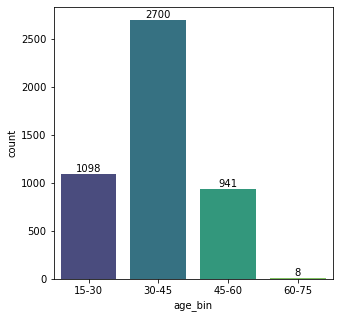

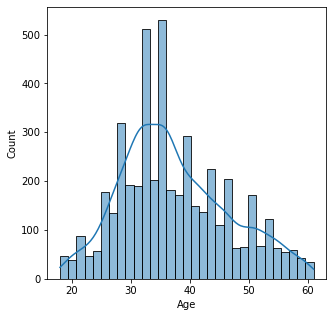

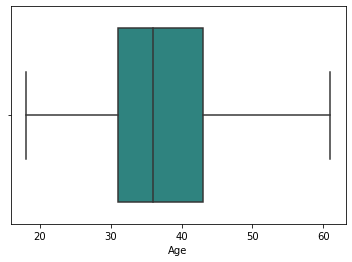

<IPython.core.display.Javascript object>

In [35]:
# building different plots to understand the data in Age column

# plotting countplot for the binned Age column
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=data, x="age_bin", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()


# plotting histplot and boxplot for Age
plt.figure(figsize=(5, 5))
ax = sns.histplot(data=data, x="Age", kde=True)
plt.show()
ax = sns.boxplot(data=data, x="Age", palette="viridis")
plt.show()

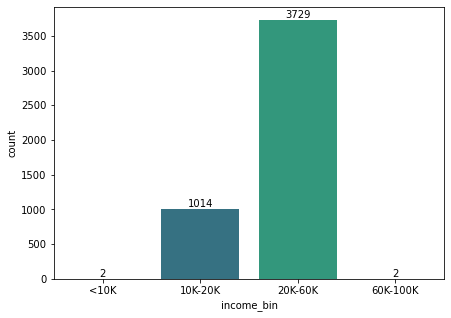

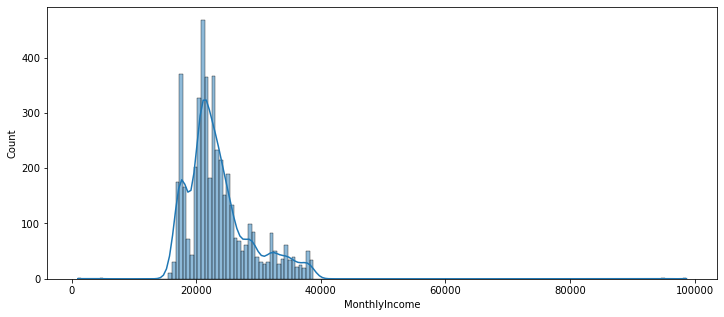

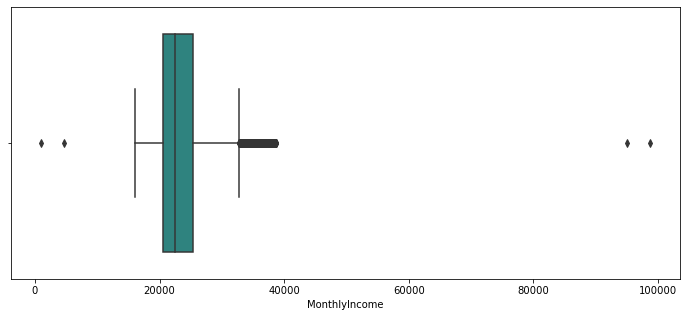

<IPython.core.display.Javascript object>

In [36]:
# building different plots to understand the data in MonthlyIncome column

# plotting countplot for the MonthlyIncome column
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=data, x="income_bin", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

# plotting histplot and boxplot for MonthlyIncome
plt.figure(figsize=(12, 5))
ax = sns.histplot(data=data, x="MonthlyIncome", kde=True)
plt.show()
plt.figure(figsize=(12, 5))
ax = sns.boxplot(data=data, x="MonthlyIncome", palette="viridis")
plt.show()

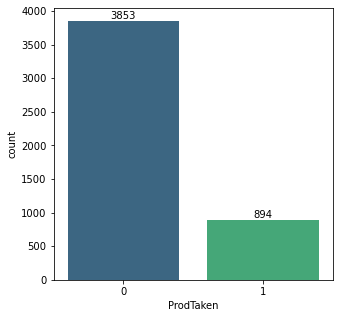

<IPython.core.display.Javascript object>

In [37]:
# plotting countplot for the ProdTaken column
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=data, x="ProdTaken", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

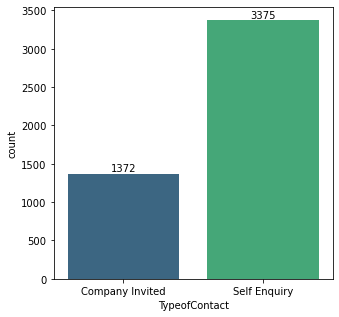

<IPython.core.display.Javascript object>

In [38]:
# plotting countplot for the TypeofContact column
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=data, x="TypeofContact", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

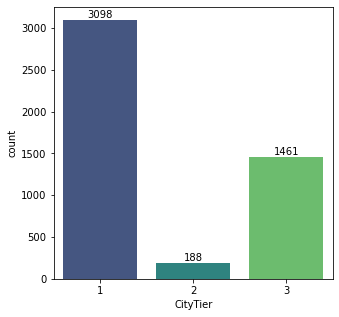

<IPython.core.display.Javascript object>

In [39]:
# plotting countplot for the CityTier column
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=data, x="CityTier", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

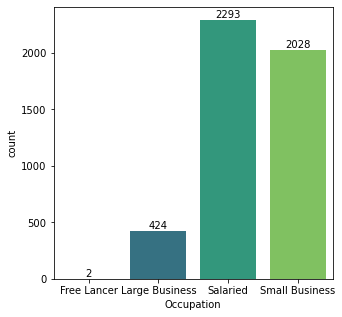

<IPython.core.display.Javascript object>

In [40]:
# plotting countplot for the Occupation column
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=data, x="Occupation", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

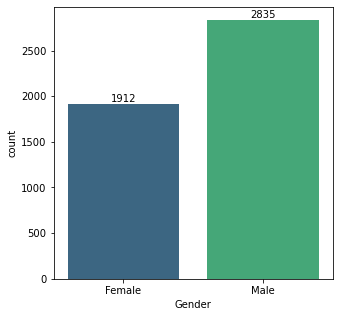

<IPython.core.display.Javascript object>

In [41]:
# plotting countplot for the Gender column
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=data, x="Gender", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

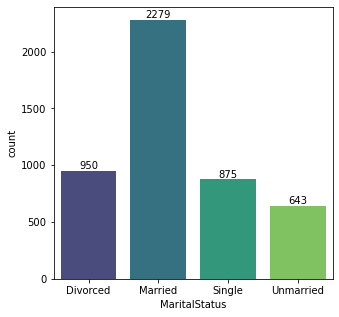

<IPython.core.display.Javascript object>

In [42]:
# plotting countplot for the MaritalStatus column
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=data, x="MaritalStatus", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

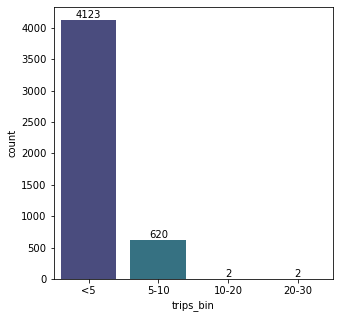

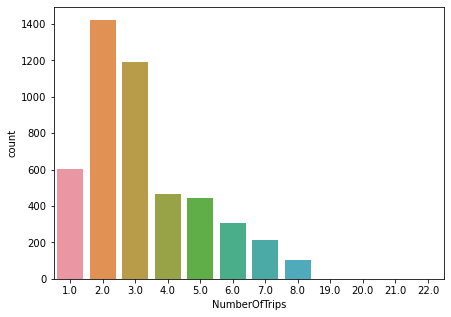

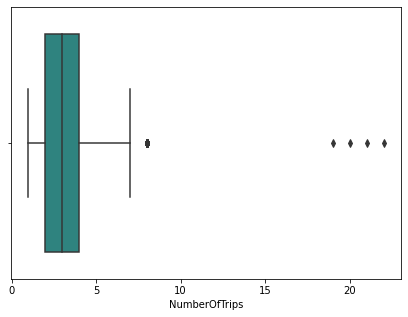

<IPython.core.display.Javascript object>

In [43]:
# plotting countplot for the binned NumberOfTrips column
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=data, x="trips_bin", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()


# plotting countplot and boxplot for NumberOfTrips
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=data, x="NumberOfTrips")
plt.show()
plt.figure(figsize=(7, 5))
ax = sns.boxplot(data=data, x="NumberOfTrips", palette="viridis")
plt.show()

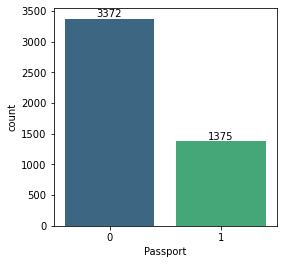

<IPython.core.display.Javascript object>

In [44]:
# plotting countplot for the Passport column
plt.figure(figsize=(4, 4))
ax = sns.countplot(data=data, x="Passport", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

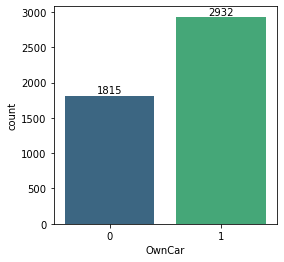

<IPython.core.display.Javascript object>

In [45]:
# plotting countplot for the OwnCar column
plt.figure(figsize=(4, 4))
ax = sns.countplot(data=data, x="OwnCar", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

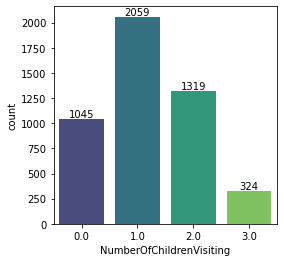

<IPython.core.display.Javascript object>

In [46]:
# plotting countplot for the NumberOfChildrenVisiting column
plt.figure(figsize=(4, 4))
ax = sns.countplot(data=data, x="NumberOfChildrenVisiting", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

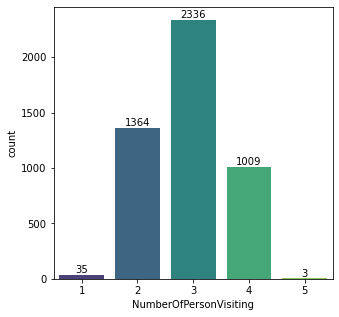

<IPython.core.display.Javascript object>

In [47]:
# plotting countplot for the NumberOfPersonVisiting column
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=data, x="NumberOfPersonVisiting", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

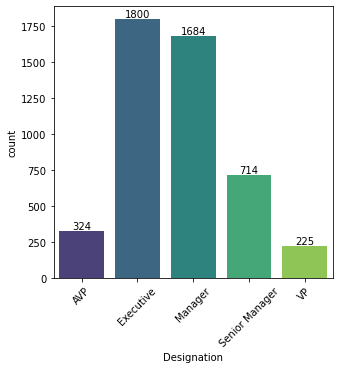

<IPython.core.display.Javascript object>

In [48]:
# plotting countplot for the Designation column
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=data, x="Designation", palette="viridis")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.show()

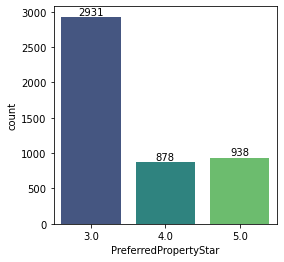

<IPython.core.display.Javascript object>

In [49]:
# plotting countplot for the PreferredPropertyStar column
plt.figure(figsize=(4, 4))
ax = sns.countplot(data=data, x="PreferredPropertyStar", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

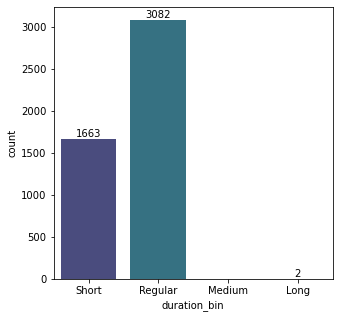

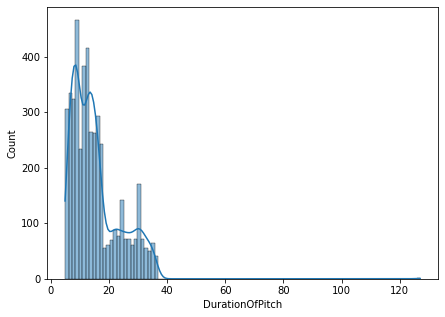

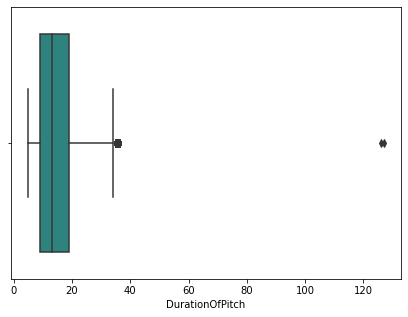

<IPython.core.display.Javascript object>

In [50]:
# plotting countplot for the binned DurationOfPitch column
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=data, x="duration_bin", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

# plotting histplot and boxplot for DurationOfPitch
plt.figure(figsize=(7, 5))
ax = sns.histplot(data=data, x="DurationOfPitch", kde=True)
plt.show()
plt.figure(figsize=(7, 5))
ax = sns.boxplot(data=data, x="DurationOfPitch", palette="viridis")
plt.show()

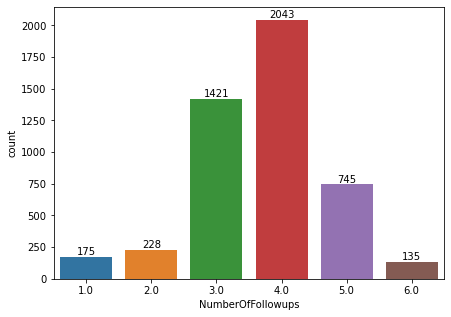

<IPython.core.display.Javascript object>

In [51]:
# plotting histplot and boxplot for NumberOfFollowups
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=data, x="NumberOfFollowups")
ax.bar_label(ax.containers[0])
plt.show()

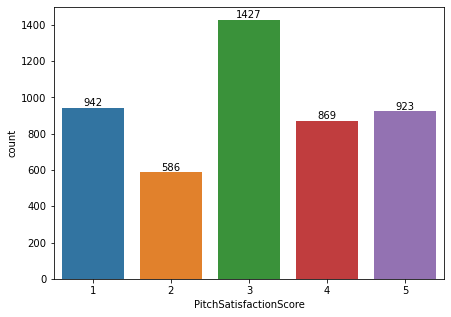

<IPython.core.display.Javascript object>

In [52]:
# plotting histplot and boxplot for PitchSatisfactionScore
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=data, x="PitchSatisfactionScore")
ax.bar_label(ax.containers[0])
plt.show()

##### <span style="color:green">Observations of Univariate Analyses</span>
1. Most customers in the dataset fall in the 30-45 age set (around 2700), followed by those in 15-30 dataset (1098). This is understandable, as millenials have a more favourable attitude and financial situation towards travelling than Gen X or baby boomers. 
2. The Age histogram is slightly right skewed, but has no outliers. 
3. Most of the customers fall in the 20K-60K income set (3729), followed by 10K-20K (1014). We have already observed that median income is around 23,500. The income histogram is right skewed, with outliers on both sides. 
4. Only approx 19% of the dataset have purchased a product (894 out of 4747). 
5. Most customers initiate a travel enquiry on their own (3375) and a company initiated enquiry occurs only 1372 times in the dataset. 
6. Most customers are from a Top Tier city (3098 customers), followed by Tier 3 (1461) and only a very small percentage from Tier 2. 
7. Most customers are Salaried (2293), followed by small business (2028). There 424 Large Business customers whereas just 2 freelancers. 
8. 2835 customers are male, followed by 1912 female customers. 
9. 2279 customers are married, followed by 950 divorced customers.
10. Most customers take / intend to take less than 5 trips a year (4123), followed by 620 customers who take 5-10 trips a year. There are cases where customers have indicated taking greater than 10 trips a year - these may be outliers and will need investigation.
11. Only 1375 customers own a passport. 
12. Majority of the customers own a car (2932). 
13. 2059 customers have indicated that atleast 1 child will travel with them. 1319 customers have indicated 2 children will travel with them, whereas 1045 indicated that they will have no children in their trip.
14. Most customers have indicated that it is a 3 person trip, followed by 1364 customers with just 2 people in their trip. 
15. Most of the customers are either an Executive or a Manager. There are only 225 VPs in this dataset. 
16. Close to 2900 customers have indicated a preferred property rating of 3 stars.  
17. In most cases, duration of pitch is between 10-50 hours, followed by shorter durations between 1-10 hours. DurationOfPitch is highly right skewed, with outliers. 
18. Most customers (2045) have been followed up 4 times, before the pitch was concluded. 
19. Most customers(1427) rated a satisfaction of 3 for their pitch.

### Multivariate Analysis

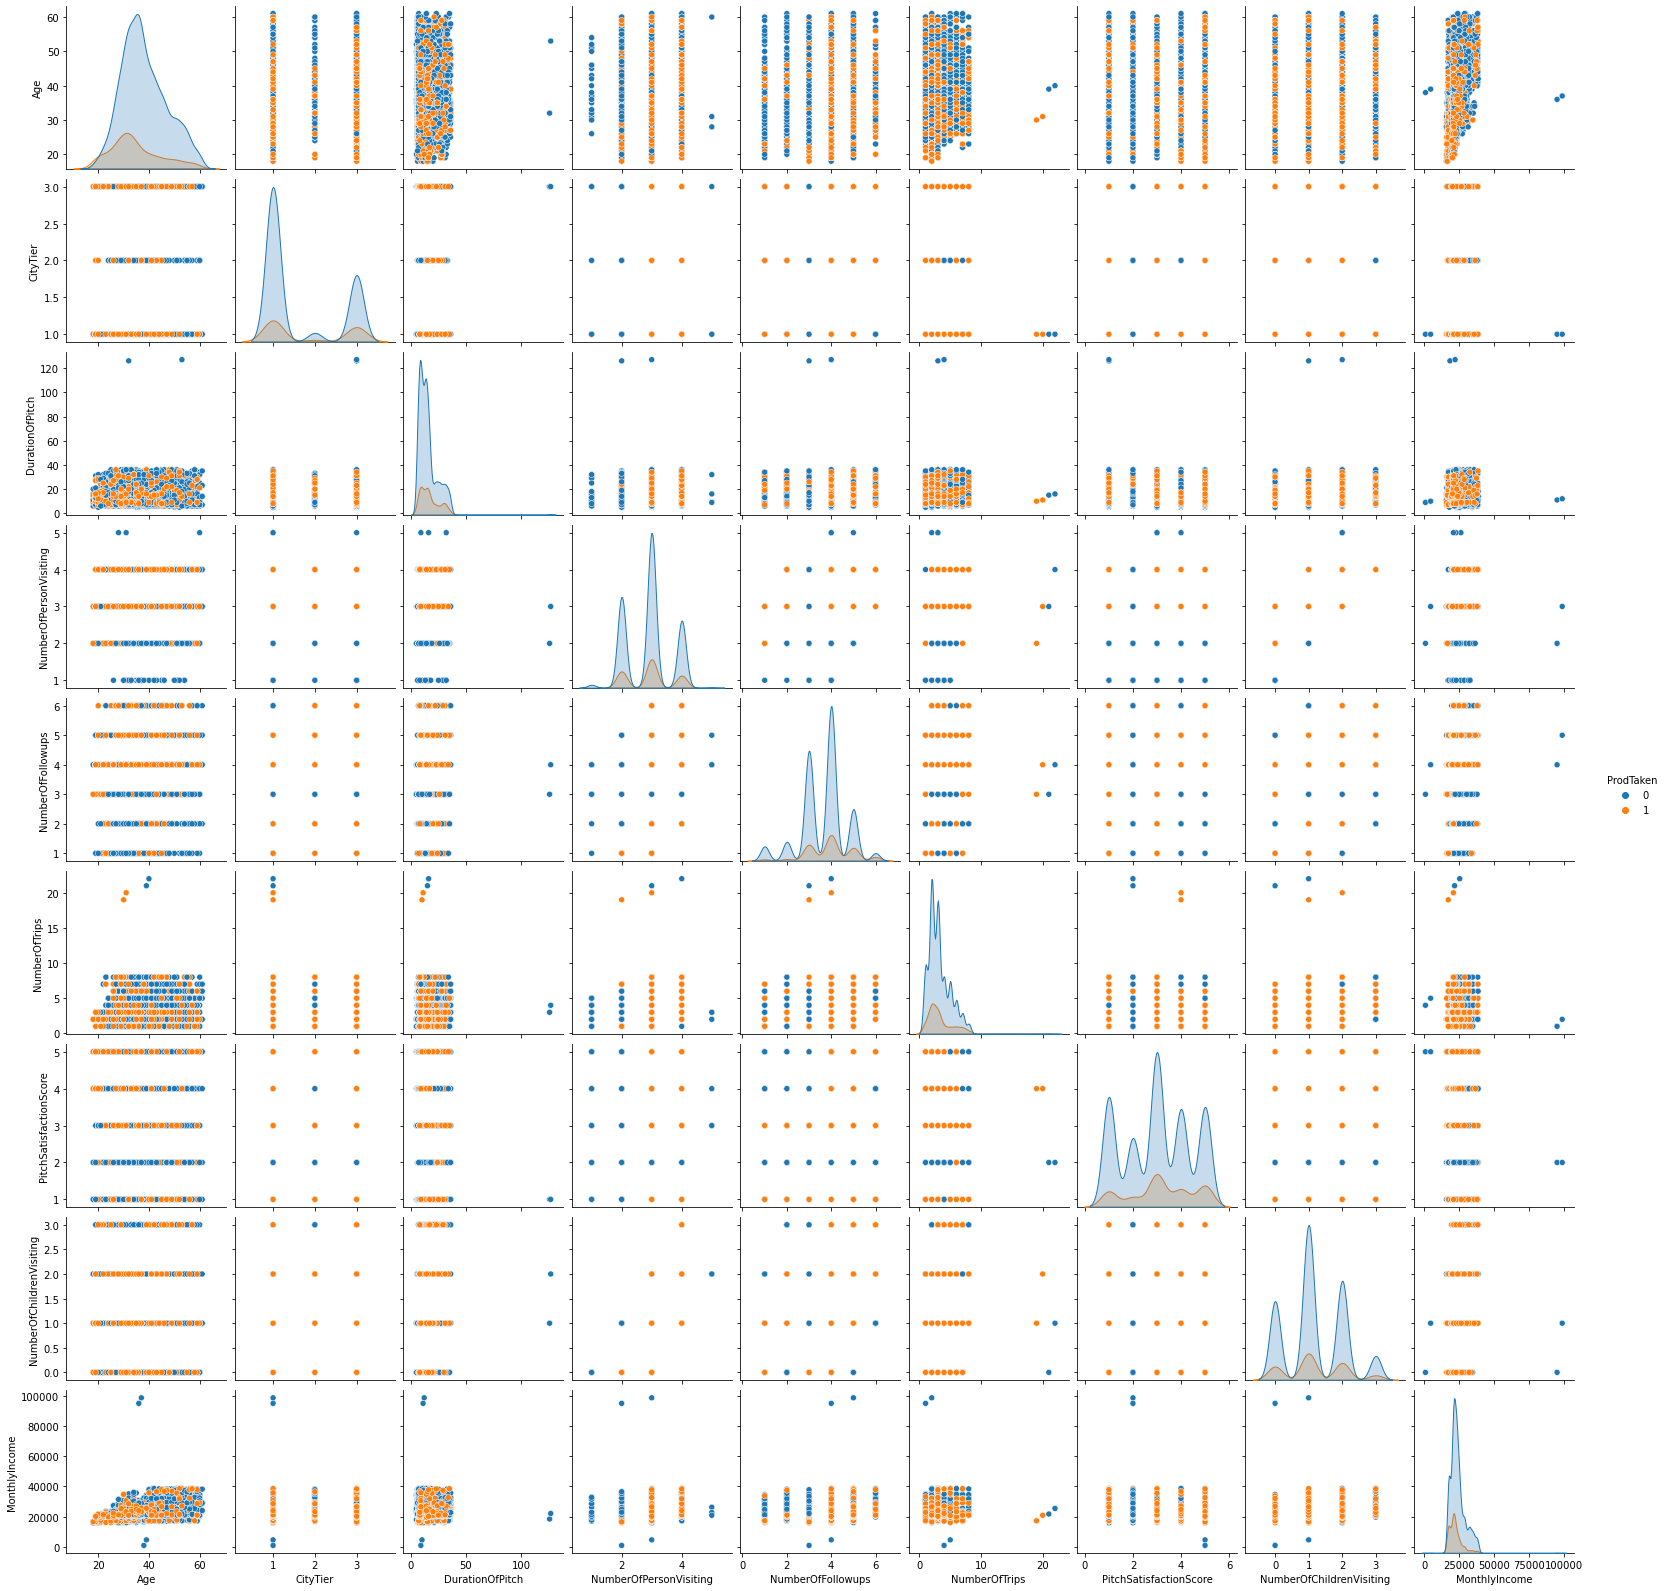

<IPython.core.display.Javascript object>

In [53]:
# plotting pairplot between the different variables to understand the nature of correlations

sns.pairplot(data, hue="ProdTaken")
plt.show()

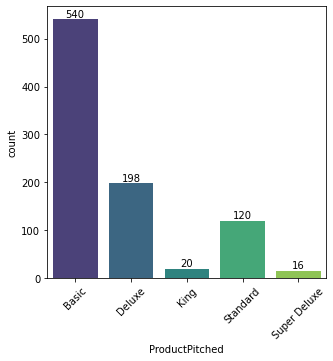

<IPython.core.display.Javascript object>

In [54]:
# plotting countplot for the ProductPitched column where ProdTaken=1
plt.figure(figsize=(5, 5))
ax = sns.countplot(
    data=data[data["ProdTaken"] == 1], x="ProductPitched", palette="viridis"
)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.show()

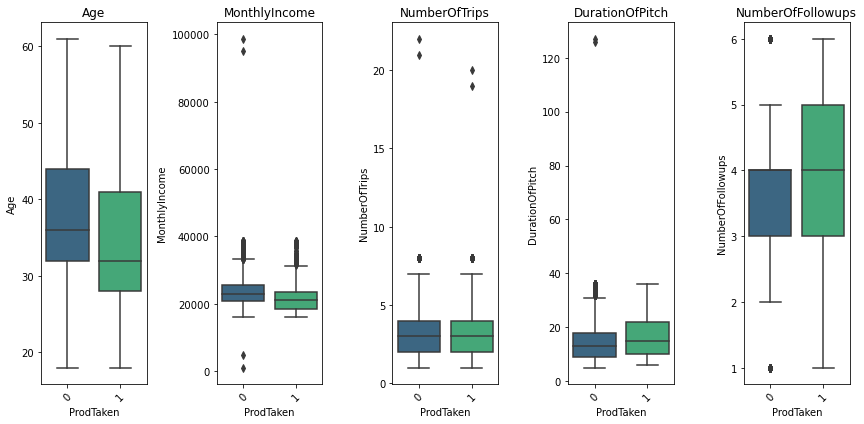

<IPython.core.display.Javascript object>

In [55]:
# boxplot of numerical columns vs the ProdTaken

cols = data[
    ["Age", "MonthlyIncome", "NumberOfTrips", "DurationOfPitch", "NumberOfFollowups"]
].columns.tolist()
plt.figure(figsize=(12, 6))

for i, variable in enumerate(cols):
    plt.subplot(1, 5, i + 1)
    sns.boxplot(data["ProdTaken"], data[variable], palette="viridis")
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.title(variable)
plt.show()

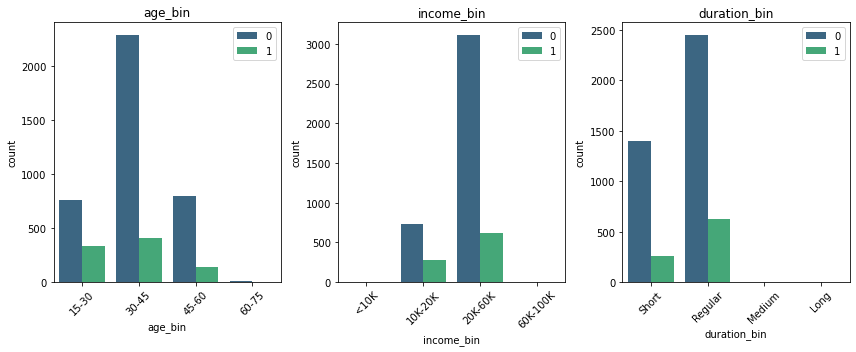

<IPython.core.display.Javascript object>

In [56]:
# countplots for the interval variables vs the ProdTaken

cat = data[["age_bin", "income_bin", "duration_bin"]].columns.tolist()
plt.figure(figsize=(12, 5))

for i, variable in enumerate(cat):
    plt.subplot(1, 3, i + 1)
    sns.countplot(data=data, hue="ProdTaken", x=data[variable], palette="viridis")
    plt.tight_layout()
    plt.title(variable)
    plt.xticks(rotation=45)
    plt.legend(loc="upper right")
plt.show()

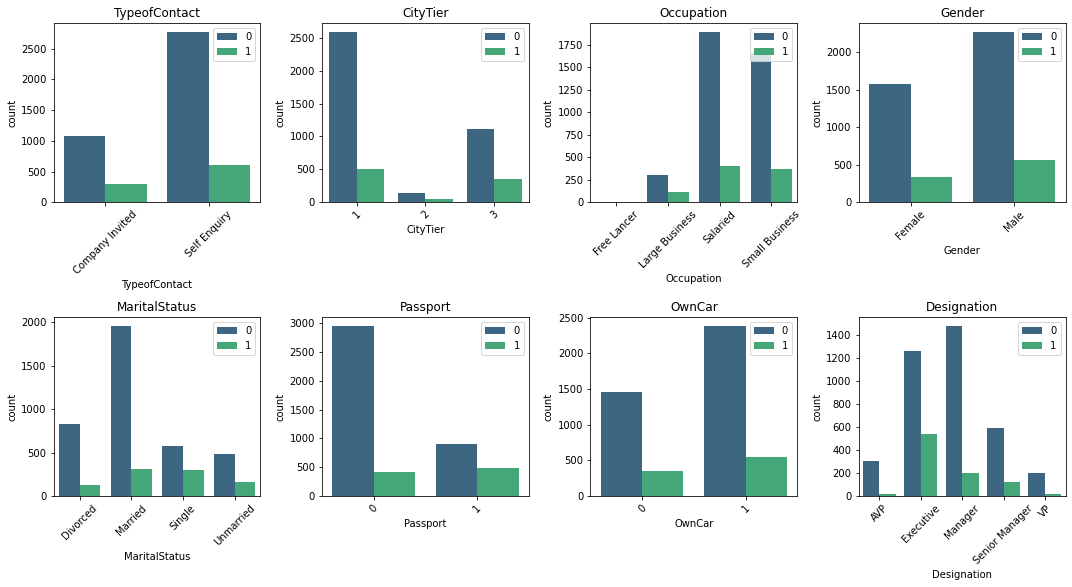

<IPython.core.display.Javascript object>

In [57]:
# understanding different relationships between demographic variables and ProdTaken
demographic = data[
    [
        "TypeofContact",
        "CityTier",
        "Occupation",
        "Gender",
        "MaritalStatus",
        "Passport",
        "OwnCar",
        "Designation",
    ]
].columns.tolist()
plt.figure(figsize=(15, 8))

for i, variable in enumerate(demographic):
    plt.subplot(2, 4, i + 1)
    sns.countplot(data=data, hue="ProdTaken", x=data[variable], palette="viridis")
    plt.tight_layout()
    plt.title(variable)
    plt.xticks(rotation=45)
    plt.legend(loc="upper right")
plt.show()

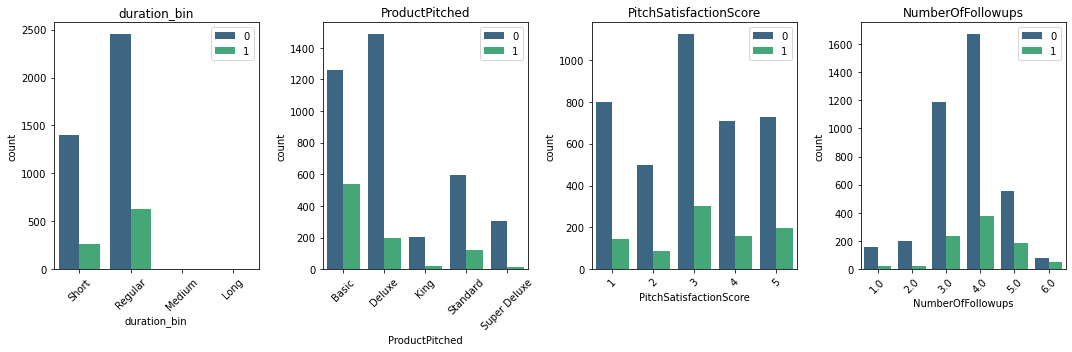

<IPython.core.display.Javascript object>

In [58]:
# understanding relationship between interaction variables and ProdTaken

interaction = data[
    ["duration_bin", "ProductPitched", "PitchSatisfactionScore", "NumberOfFollowups",]
].columns.tolist()
plt.figure(figsize=(15, 5))

for i, variable in enumerate(interaction):
    plt.subplot(1, 4, i + 1)
    sns.countplot(data=data, hue="ProdTaken", x=data[variable], palette="viridis")
    plt.tight_layout()
    plt.title(variable)
    plt.xticks(rotation=45)
    plt.legend(loc="upper right")
plt.show()

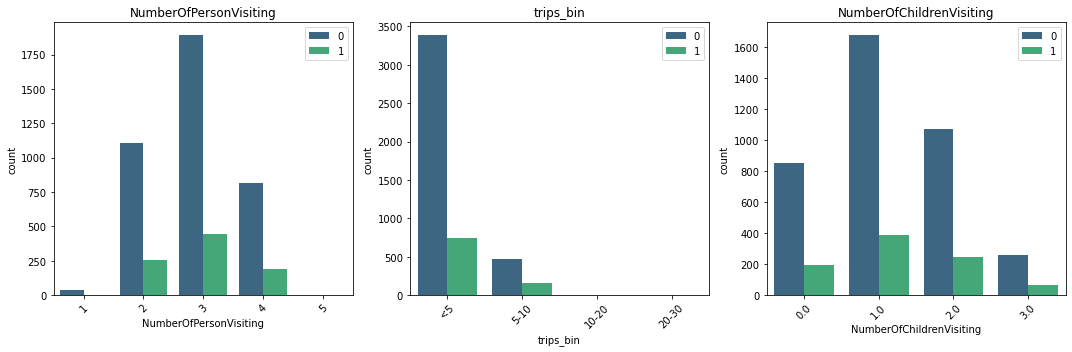

<IPython.core.display.Javascript object>

In [59]:
# understanding relationship between trip related variables and ProdTaken
# omitting the PreferredPropertyStar variables since all customers chose 3 as the preferred rating

trip = data[
    ["NumberOfPersonVisiting", "trips_bin", "NumberOfChildrenVisiting",]
].columns.tolist()
plt.figure(figsize=(15, 5))

for i, variable in enumerate(trip):
    plt.subplot(1, 3, i + 1)
    sns.countplot(data=data, hue="ProdTaken", x=data[variable], palette="viridis")
    plt.tight_layout()
    plt.title(variable)
    plt.xticks(rotation=45)
    plt.legend(loc="upper right")
plt.show()

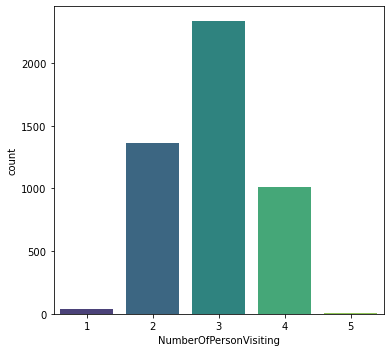

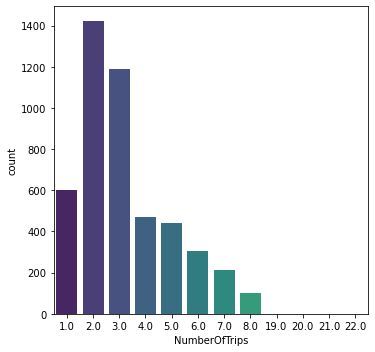

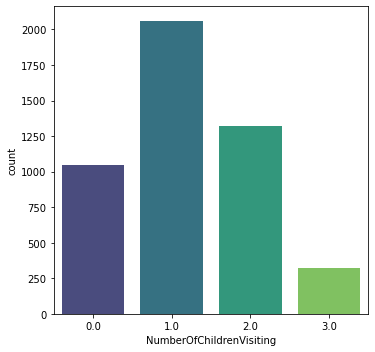

<IPython.core.display.Javascript object>

In [60]:
# countplots for trip related variables vs ProdTaken
trip = data[
    ["NumberOfPersonVisiting", "NumberOfTrips", "NumberOfChildrenVisiting",]
].columns.tolist()


for i, variable in enumerate(trip):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, i + 1)
    sns.countplot(
        data=data[data["ProdTaken"] == 1], x=data[variable], palette="viridis",
    )
    plt.tight_layout()
    plt.show()

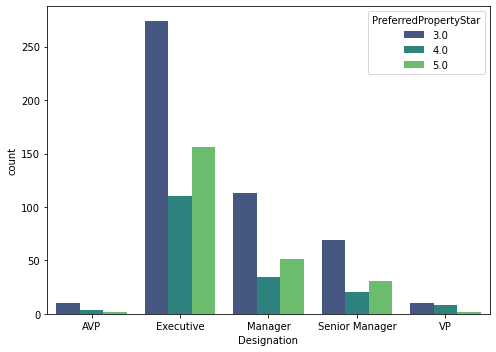

<IPython.core.display.Javascript object>

In [61]:
# let's see what is the relationship between Designation and PreferredPropertyStar
plt.figure(figsize=(7, 5))
sns.countplot(
    data=data[data["ProdTaken"] == 1],
    x="Designation",
    hue="PreferredPropertyStar",
    palette="viridis",
)
plt.tight_layout()
plt.show()

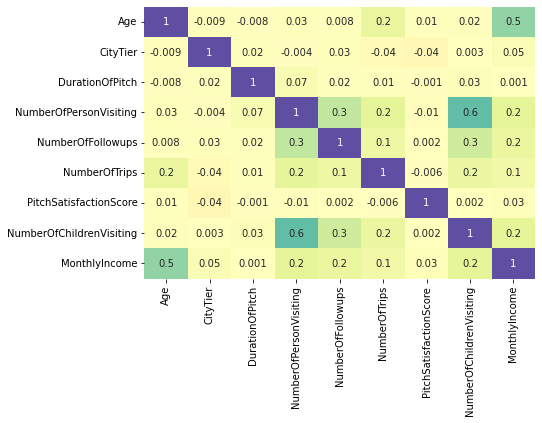

<IPython.core.display.Javascript object>

In [62]:
# observe the correlation between numerical features
plt.figure(figsize=(7, 5))
sns.heatmap(
    data.corr(), annot=True, vmin=-1, vmax=1, fmt=".1g", cmap="Spectral", cbar=False
)
plt.show()

##### <span style="color:green">Observations from Multivariate Analysis</span>
1. The median Age of customers who purchased a product is 32 years. 
2. The median income of customers who purchased a product is 20,000, ranging from 18,000 to 35,000.
3. Customers who purchased a product are likely to 3 trips in a year on an average. 
4. The average duration of pitch for someone who purchased a product is higher than for those who did not (17 vs 16). 
5. Customers who purchase a product mostly fall in the 30-45 age group, followed by the 15-30 age group. 
6. Customers in the 20K-60K group tend to purchase a product mostly, then followed by customers in the 10-20K bracket. 
7. Self-Enquiry is the most popular type of contact in customers who purchase a product. 
8. Customers who purchase a product are mostly from Tier 1 cities, followed by Tier 3 cities. 
9. Customers who purchase a product are mostly salaried, and then from small businesses. 
10. Customers who purchase a product are mostly male, married, own their car and passport and are mostly executives. 
11. Most customers purchase basic products followed by Deluxe products. 
12. Customers mostly rate 3 & 5 satisfaction scores on the pitch. 
13. Most customers need 3-5 follow-ups, and have a regular or short pitch.
14. Most customers have 2-4 persons in the trip, and mostly atleast 1 child included.
15. Most customers who purchase a product take 2-4 trips per year.
16. There is very strong correlation between Age and MonthlyIncome, Number of Children Visiting and Number of Persons Visiting.
17. Most of the customers prefer a property of rating 3 or more. 

### Customer Profiling based on package selection

In this section, let us try to build a customer profile from the data that we have. We will take customers who have purchased the product (ProdTaken == 1) and then see what data we can derive by analysing the different packages they purchased. 

In [63]:
# isolate the rows where ProdTaken = 1,
Prod_taken = data[data["ProdTaken"] == 1]
Prod_taken.shape

(894, 23)

<IPython.core.display.Javascript object>

There are 894 rows where a positive purchase was made. We know from previous EDA how the distribution of purchase was made. Resurfacing the graph by using Prod_Taken dataframe.

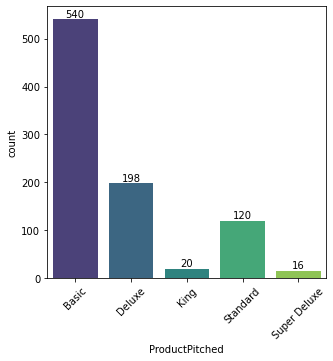

<IPython.core.display.Javascript object>

In [64]:
# plotting countplot for the ProductPitched column where ProdTaken=1
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=Prod_taken, x="ProductPitched", palette="viridis")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.show()

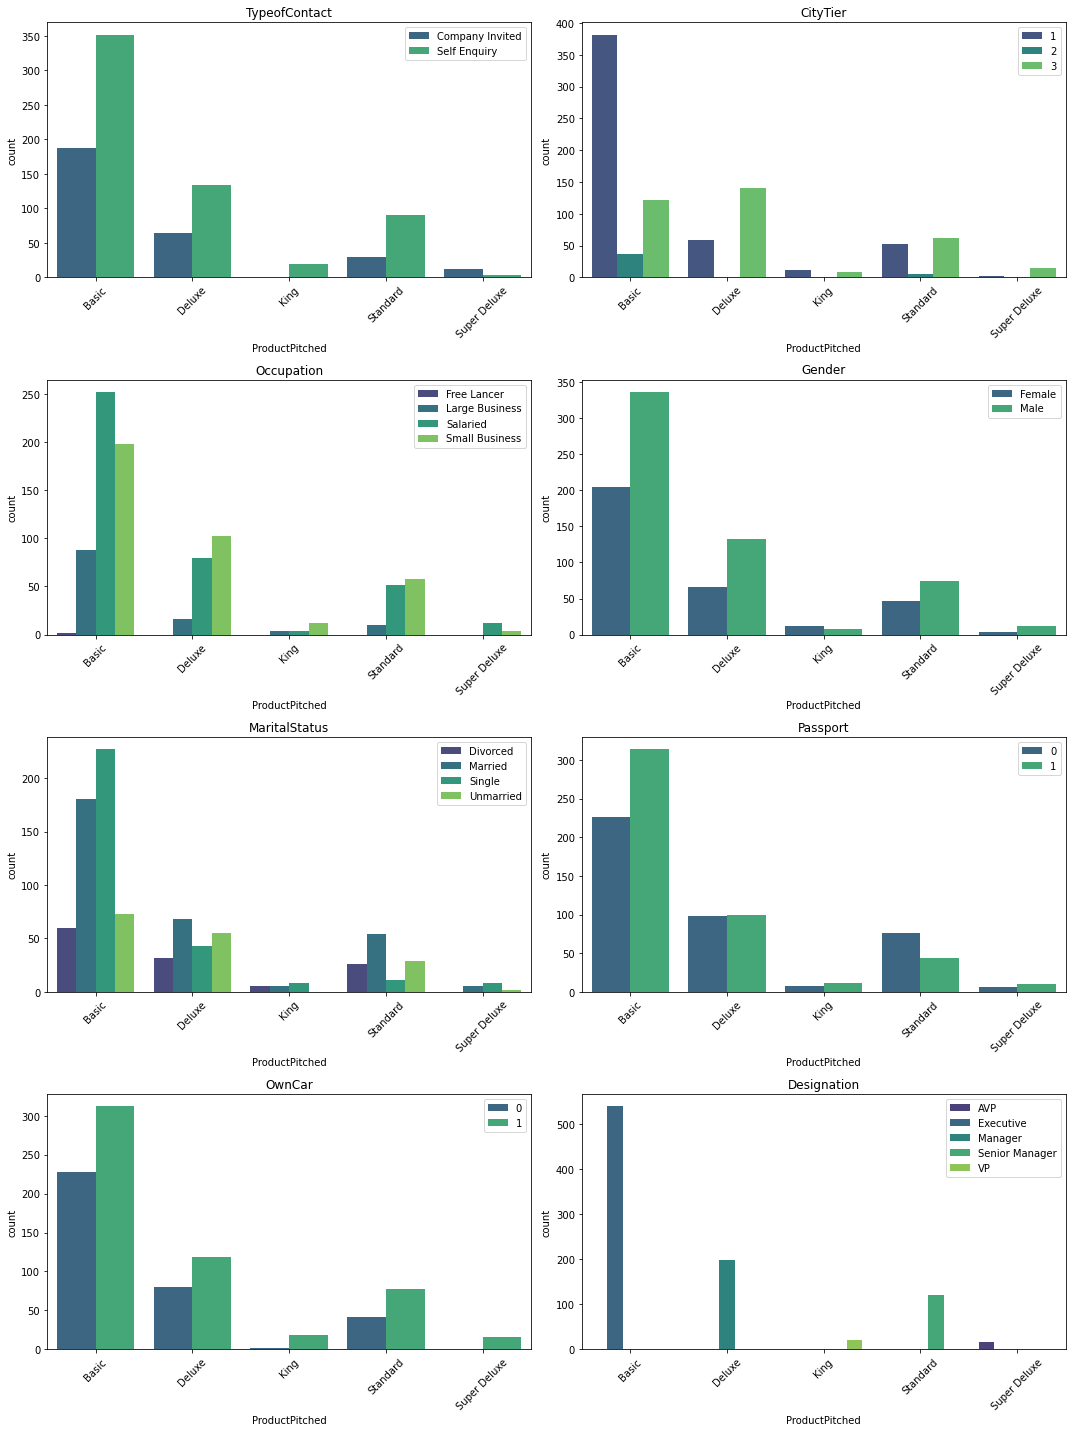

<IPython.core.display.Javascript object>

In [65]:
# profiling the ProductPitched against the different demographic details
plt.figure(figsize=(15, 20))

for i, variable in enumerate(demographic):
    plt.subplot(4, 2, i + 1)
    sns.countplot(
        data=Prod_taken,
        x="ProductPitched",
        hue=Prod_taken[variable],
        palette="viridis",
    )
    plt.tight_layout()
    plt.title(variable)
    plt.xticks(rotation=45)
    plt.legend(loc="upper right")
plt.show()

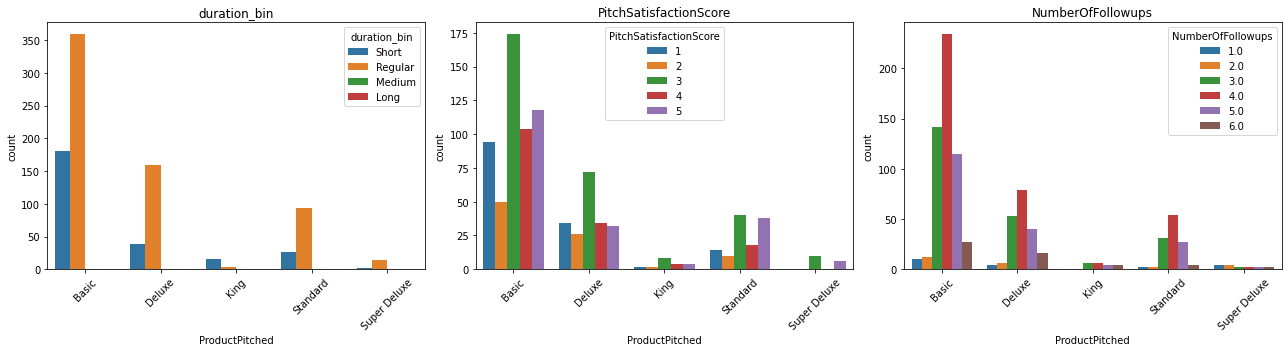

<IPython.core.display.Javascript object>

In [66]:
# profiling the ProductPitched against the remaining interaction variables
interaction_new = ["duration_bin", "PitchSatisfactionScore", "NumberOfFollowups"]

plt.figure(figsize=(18, 5))

for i, variable in enumerate(interaction_new):
    plt.subplot(1, 3, i + 1)
    sns.countplot(
        data=Prod_taken, x="ProductPitched", hue=Prod_taken[variable],
    )
    plt.tight_layout()
    plt.title(variable)
    plt.xticks(rotation=45)
plt.show()

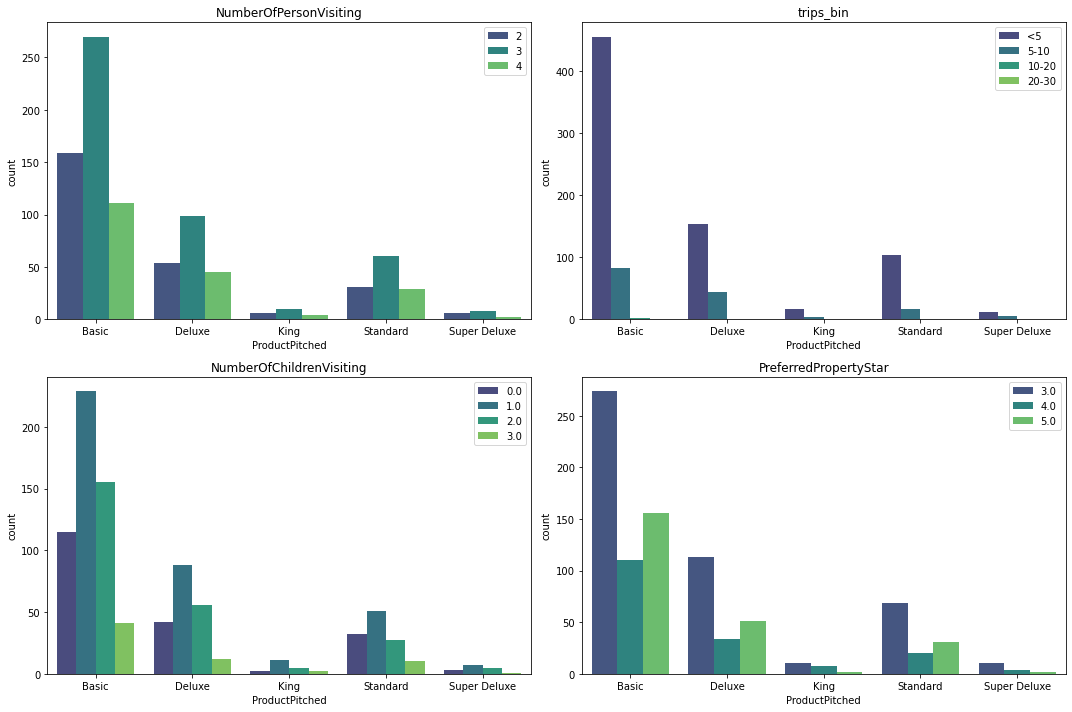

<IPython.core.display.Javascript object>

In [67]:
# profiling the ProductPitched against the trip variables
trip_profile = [
    "NumberOfPersonVisiting",
    "trips_bin",
    "NumberOfChildrenVisiting",
    "PreferredPropertyStar",
]
plt.figure(figsize=(15, 10))

for i, variable in enumerate(trip_profile):
    plt.subplot(2, 2, i + 1)
    sns.countplot(
        data=Prod_taken,
        x="ProductPitched",
        hue=Prod_taken[variable],
        palette="viridis",
    )
    plt.tight_layout()
    plt.title(variable)
    plt.legend(loc="upper right")
plt.show()

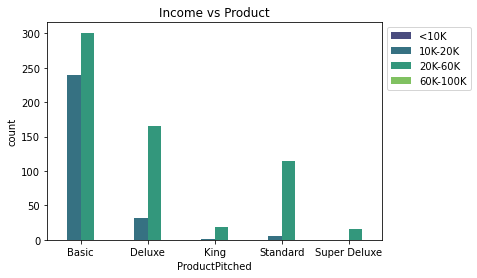

<IPython.core.display.Javascript object>

In [68]:
# profiling the ProductPitched against the binned income variable
sns.countplot(hue="income_bin", x="ProductPitched", data=Prod_taken, palette="viridis").set_title(
    "Income vs Product"
)

plt.legend(bbox_to_anchor=(1, 1))
plt.show()


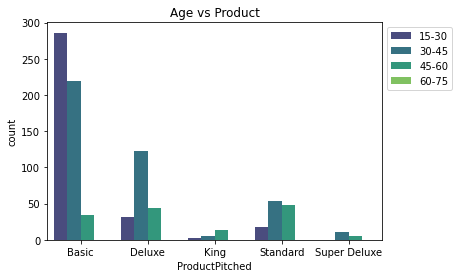

<IPython.core.display.Javascript object>

In [69]:
# profiling the ProductPitched against binned age variable
sns.countplot(
    hue="age_bin", x="ProductPitched", data=Prod_taken, palette="viridis"
).set_title("Age vs Product")

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [70]:
# let's collect the statistical summary of the income and age columns in a separate dataframe
summary_purchase = pd.DataFrame(
    Prod_taken.groupby(["ProductPitched"]).agg(
        {"MonthlyIncome": {"mean", "min", "max"}, "Age": {"mean", "min", "max"}}
    )
)


# define a function to highlight rows in a dataframe
def highlight_rows(df):
    return ["background-color: lightgray" if i % 2 == 0 else "" for i in range(len(df))]


# applying the function to the dataframe
summary_purchase.style.apply(highlight_rows, axis=0)

<IPython.core.display.Javascript object>

##### <span style="color:green">Basic</span>
1. Demographic profile: They mostly come from Tier 1 cities, are salaried. They are mostly male customers, single or married, own a passport and a car and are of executive designation. They prefer to contact the company on their own for their travel needs. These customers are mostly in the 15-45 age group and in the income bracket 10K to 40K.
2. Trip Profile: Basic products are purchased by people who prefer to travel in small groups, mostly 3, followed by 2. Most of these customer take less than 5 trips a year and some between 5-10. Mostly there is 1 child travelling in the group, but it can range anywhere from 0 to 5. Customers who purchased Basic Products mostly indicated a preferred property star of 3, followed by 5.


##### <span style="color:green">Deluxe</span>
1. Demographic profile: They mostly come from Tier 3 cities, are from small businesses. They are mostly male customers, married, may or may not own a passport, but owns a car and are of managerial designation. They prefer to contact the company on their own for their travel needs. They are mostly in the 17K to 40K income range and 21 to 60 years.
2. Trip Profile: Mostly 3 person groups, taking less than 5 trips a year, with few customers taking upto 10 trips a year. Children in the group can be anywhere from 0 to 3, but mostly just 1. Customers who purchased Deluxe also indicated a property preference of star rating 3.

##### <span style="color:green">King</span>
1. Demographic profile: They can come from Tier 1 and Tier 3 cities and are from small businesses. They are mostly female customers who are single, may or may not own a passport, but owns a car and are of managerial designation. They prefer to contact the company on their own for their travel needs. They are also in the same income range as Deluxe customers, but slightly older - 27 to 60 years.
2. Trip Profile:Mostly 3 person groups, taking less than 5 trips a year. Children in the group can be anywhere from 0 to 3, but mostly just 1.These customers showed almost equal preference for properties with star rating 3 or 5. 

##### <span style="color:green">Standard</span>
1. Demographic profile: They mostly come from Tier 3 cities, but can also be from Tier 1 cities and are from small businesses. They are mostly male customers, married, don't own a passport but have a car and are Senior Managers. They prefer to contact the company on their own for their travel needs. They are in almost the same income and age range as Deluxe customers.
2. Trip Profile:Mostly 3 person groups, taking less than 5 trips a year. Children in the group can be anywhere from 0 to 3, but mostly just 1. These customers showed a high preference for properties with star rating 3.

##### <span style="color:green">Super Deluxe</span>
1. Demographic profile: They mostly come from Tier 3 cities, and are salaried. They are mostly male customers, single, may or could own a passport, but owns a car and are of AVP designation. Their travel enquiries are company invited. These customers belong to a smaller age and income group - 39 to 56 years and 20K to 40K incomes.
2. Trip Profile: These customers are mostly 3 person groups, taking less than 5 trips a year. Children in the group can be anywhere from 0 to 2, but mostly just 1. Customers who purchased Super Deluxe products were few, but showed a clear preference for properties with star rating 3.


Note: Interaction parameters are more or less same across the products. Most products have a pitch duration of short to regular. Customer satisfaction for products are mostly average, but they can be anywhere from 1-5. Most products require 3-4 followups, except for Super Deluxe which requires only 1-2. 


### Outlier Detection

In the previous EDA, we have seen outliers in columns:
- Monthly Income
- Number of Trips
- Duration of Pitch
- Number of Followups

Since Duration of Pitch and Number of Followups are customer interaction data, we assume they will not be available for future potential customers. Therefore, we will only check for the outliers in Monthly Income and Number of Trips

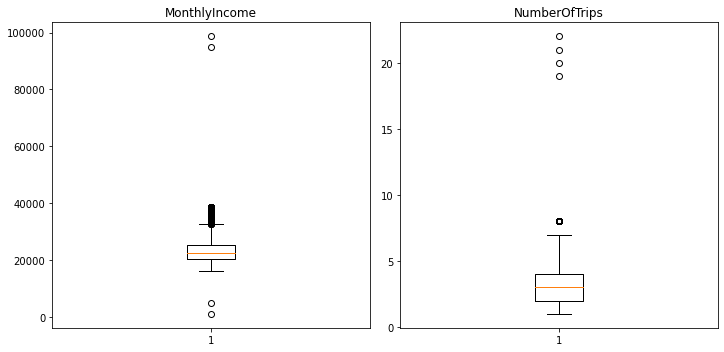

<IPython.core.display.Javascript object>

In [71]:
numerical_col = ["MonthlyIncome", "NumberOfTrips"]
plt.figure(figsize=(15, 5))

for i, variable in enumerate(numerical_col):
    plt.subplot(1, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [72]:
# calculating the Q3 values above which outliers exist
for col in numerical_col:
    quartiles = np.quantile(data[col], [0.25, 0.75])
    Q1 = quartiles[0]
    Q3 = quartiles[1]
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if lower > 0:
        print("Outlier values of", col, "are lesser than", f"{lower}")
    if upper > 0:
        print("Outlier values of", col, "are greater than", f"{upper}")
    print("\n")

Outlier values of MonthlyIncome are lesser than 13102.75
Outlier values of MonthlyIncome are greater than 32760.75


Outlier values of NumberOfTrips are greater than 7.0




<IPython.core.display.Javascript object>

#### Understanding & treating the outliers of Monthly Income

We can understand the outliers on Monthly Income, by reading them in relation to Designation and Age. As Age increases / Designation is higher, income also tends to be high. We can see if this relationship is challenged, and take actions if it is. We can also take relationships with Occupation to derive meaningful insights.

In [73]:
outlier_income = data[(data.MonthlyIncome < 13102.75) | (data.MonthlyIncome > 32760.75)]
outlier_income.shape

(366, 23)

<IPython.core.display.Javascript object>

Monthly Incomes less than 13,102
142     1000.0
2586    4678.0
Name: MonthlyIncome, dtype: float64 



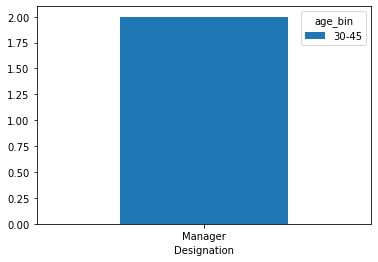

<IPython.core.display.Javascript object>

In [74]:
# isolating all rows lesser than lower whisker
count_lower = outlier_income[outlier_income["MonthlyIncome"] < 13102.75]
print("Monthly Incomes less than 13,102")
print(count_lower["MonthlyIncome"], "\n")

# Creating crosstabs between Designation and age_bins
crosstb1 = pd.crosstab(count_lower.Designation, count_lower.age_bin)

# Creating barplot
barplot = crosstb1.plot.bar(rot=0)
plt.show()

Number of MonthlyIncomes greater than 32,760:  364


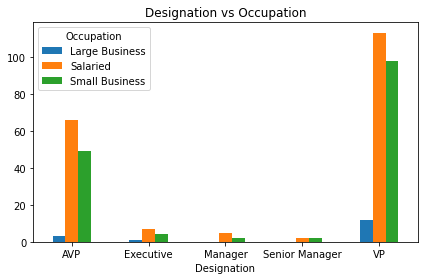

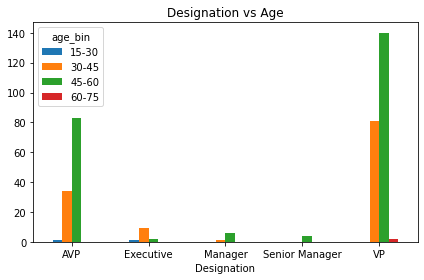

<IPython.core.display.Javascript object>

In [75]:
# isolating all rows greater than upper whisker
count_upper = outlier_income[outlier_income["MonthlyIncome"] > 32760.75]

print("Number of MonthlyIncomes greater than 32,760: ", count_upper.shape[0])

# Creating crosstabs between Designation and age_bins, Designation and Occupation
# Creating barplot to display the cross tabs


crosstb2 = pd.crosstab(count_upper.Designation, count_upper.Occupation)
barplot = crosstb2.plot.bar(rot=0)
plt.title("Designation vs Occupation")
plt.tight_layout()

crosstb3 = pd.crosstab(count_upper.Designation, count_upper.age_bin)
barplot = crosstb3.plot.bar(rot=0)
plt.title("Designation vs Age")
plt.tight_layout()

plt.show()

In [76]:
#let's print the top 5 incomes for each of the observed designations to understand what ranges they come in
count_upper.sort_values(by=['Designation', 'MonthlyIncome'], ascending=[True, False], inplace=True)
count_upper_grouped = count_upper.groupby(by='Designation')
for name, group in count_upper_grouped:
    print("Designation:", name)
    print(group.head(5)[['MonthlyIncome']])
    print("\n")



Designation: AVP
      MonthlyIncome
4827        37502.0
3097        36602.0
4567        36602.0
3818        36553.0
2873        36539.0


Designation: Executive
      MonthlyIncome
2482        98678.0
38          95000.0
4836        37868.0
4869        37865.0
4821        36891.0


Designation: Manager
      MonthlyIncome
4832        38525.0
4830        37467.0
4850        36739.0
4859        35558.0
2388        34847.0


Designation: Senior Manager
      MonthlyIncome
4870        38395.0
4818        36943.0
2426        34717.0
2374        33265.0


Designation: VP
      MonthlyIncome
2634        38677.0
4104        38677.0
3190        38651.0
4660        38651.0
3295        38621.0




<IPython.core.display.Javascript object>

##### <span style="color:green">Observations</span>

1. We can see that only two rows have observations less than the lower whisker, 13,102. They correspond to Managers in the age-group 30-45.  
2. 364 rows have Monthly Income greater than 32,760, the upper whisker. They mostly correspond to senior level management - VP, AVP, Executives, Sr. Managers, etc. This constitutes rougly 7% of our total data. 
3. We can see that most of the highest outliers are in the range 32-39K, which is very close to the upper whisker. However, there are two rows with extremely high values- executives with 95,000 & 98,678 incomes. This seems extremely high and could be errorneous data.These values need to be treated.
4. The values less than lower whisker are really small for managerial roles - 1000 and 4678 - especially when compared to other managers in the dataset. This could also be erroneous data and needs to be treated.

##### <span style="color:green">Treating outliers</span>
1. This dataset contains several deficiencies when it comes to treating these outliers. 
- while the dataset indicates the Occupation of the customer, it doesn't indicate whether it is a Google-sized company or any other. For example, the VP of Google roughly earns 7,00,000USD per year whereas the VP of Air Canada only earns 2,00,00USD per year. 
- We also do not know which country or which currency is represented in this dataset.  
2. However, after assessing the data thoroughly, we found that the four values below could be really erroneous, and we can drop off these rows, since they could be compromised data.

MonthlyIncome values:
- 1000
- 4678
- 95000
- 98678

In [77]:
# dropping off the rows with values we identified as erroneous

data.drop(
    data[
        (data["MonthlyIncome"] == 1000)
        | (data["MonthlyIncome"] == 4678)
        | (data["MonthlyIncome"] == 95000)
        | (data["MonthlyIncome"] == 98678)
    ].index,
    inplace=True,
)

<IPython.core.display.Javascript object>

In [78]:
# verifying that only four rows were dropped.
data.shape

(4743, 23)

<IPython.core.display.Javascript object>

#### Understanding & treating the outliers of Number of Trips

Once again, let us take observe the relationships between Number of Trips vs Designation and Monthly Income, and try to derive meaningful insights. The reason why we are considering these variables are because, as you income increases, your lifestyle can comfortably accommodate many trips. It is also possible that as responsibilities increases, you would need to travel more for your company. 

In [79]:
# isolate the rows where the NumberOfTrips are higher than the upper whisker
outlier_trips = data[(data.NumberOfTrips > 7)]
outlier_trips.shape

(106, 23)

<IPython.core.display.Javascript object>

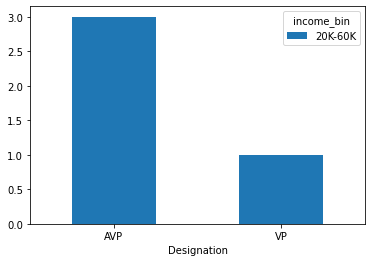

<IPython.core.display.Javascript object>

In [80]:
# Creating crosstabs between Designation and income_bins
crosstb4 = pd.crosstab(outlier_trips.Designation, outlier_income.income_bin)

# Creating barplot
barplot = crosstb4.plot.bar(rot=0)
plt.show()

In [81]:
outlier_trips["NumberOfTrips"].value_counts()

8.0     102
19.0      1
21.0      1
20.0      1
22.0      1
Name: NumberOfTrips, dtype: int64

<IPython.core.display.Javascript object>

##### <span style="color:green">Observations</span>
1. Looking at the incomes and designations, higher number of trips were taken by senior officials of companies. The outlier data consists of roughly 3% of the original dataset.
2. Looking at the number of trips taken in a year, 8 trips seems to be a reasonable count for senior officials. However, 22 trips in a year would mean approximately 2 trips per month, which seems feasible, but not practical. It would mean someone would have to be on the road all the year round. Since there are only 4 rows with very high values (19, 20, 21,22 trips), it would be better to treat them. 

##### <span style="color:green">Treating Outliers</span>
We can treat the higher values of NumberOfTrips columns, i.e., 19-22 trips, by dropping off the rows with these values

In [82]:
# dropping off the rows with values we identified as erroneous

data.drop(
    data[
        (data["NumberOfTrips"] == 19.0)
        | (data["NumberOfTrips"] == 20.0)
        | (data["NumberOfTrips"] == 21.0)
        | (data["NumberOfTrips"] == 22.0)
    ].index,
    inplace=True,
)

<IPython.core.display.Javascript object>

In [83]:
# verifying the shape of new dataset
data.shape

(4739, 23)

<IPython.core.display.Javascript object>

### Feature Scaling

We can take a look at the numerical columns and see if there is a need for scaling

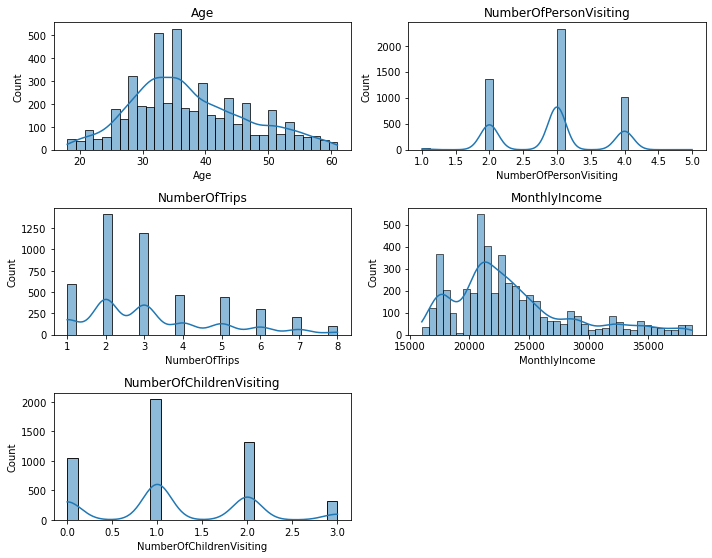

<IPython.core.display.Javascript object>

In [84]:
#isolating the numerical datatype columns, excluding the customer interaction data
nume_cols = [
    "Age",
    "NumberOfPersonVisiting",
    "NumberOfTrips",
    "MonthlyIncome",
    "NumberOfChildrenVisiting",
]

plt.figure(figsize=(10,10))

for i, variable in enumerate(nume_cols):
    plt.subplot(4, 2, i + 1)
    sns.histplot(data=data, x=data[variable], kde=True)
    plt.title(variable)

plt.tight_layout()
plt.show()


All the numerical columns are on different scales. Since outliers have been treated and  the distributions are skewed, we can use MinMax scaling on these features

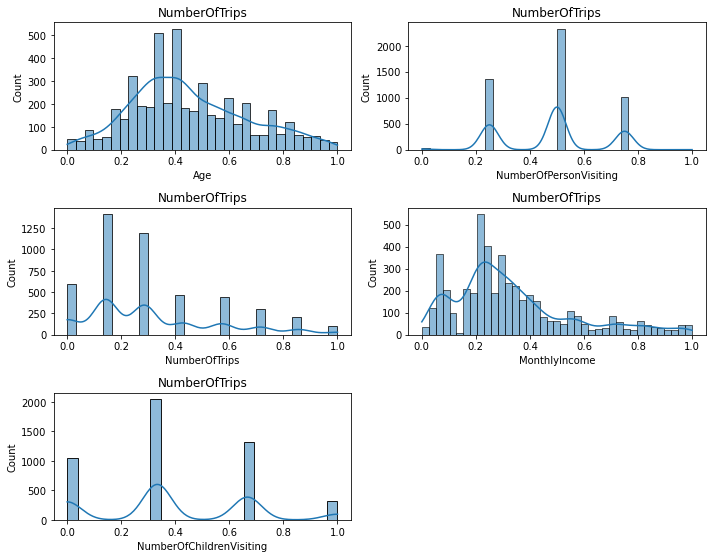

<IPython.core.display.Javascript object>

In [85]:
# perform MinMax scaling
data[
    [
        "Age",
        "NumberOfPersonVisiting",
        "NumberOfTrips",
        "MonthlyIncome",
        "NumberOfChildrenVisiting",
    ]
] = MinMaxScaler().fit_transform(
    data[
        [
            "Age",
            "NumberOfPersonVisiting",
            "NumberOfTrips",
            "MonthlyIncome",
            "NumberOfChildrenVisiting",
        ]
    ]
)

plt.figure(figsize=(10, 10))

for i, variable in enumerate(nume_cols):
    plt.subplot(4, 2, i + 1)
    sns.histplot(data=data, x=data[variable], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

### Model Building

Let us start to build our model using:
- Bagging 
- Boosting and
- Stacking techniques

### Model Evaluation Criteria

When we build the model, the following outcomes can be wrongly predicted.
- Predicting a customer will purchase a product, but actually will not. (False Positive)
    - In this case, the marketing team would have spent a lot of money pitching to this customer, to no avail. A wrong prediction of this sort can be very expensive to the company.
- Predicting a customer will not purchase a product, but actually will. (False Negative)
    - In this case, by not focusing on a potential customer, the company loses him/her, which is a loss of opportunity. The stated objective of this model is to reduce wrong predictions like this.

#### Objective of the model

The stated objective of the business is to predict which customer is more likely to purchase a new product, therefore it is necessary to identify as many potential customers as possible, and reduce False Negatives. Therefore, we must aim at increasing recall. 

Recall is the metric of interest here. 

### Data Preparation

We will drop the customer interaction variables, since we cannot have those variables for new customers. We will also drop the binned variables, as we have already used them in EDA and they cannot be useful anymore in model building. 

In [86]:
data = data.drop(
    [
        "ProductPitched",
        "PitchSatisfactionScore",
        "NumberOfFollowups",
        "DurationOfPitch",
        "age_bin",
        "trips_bin",
        "duration_bin",
        "income_bin",
    ],
    axis=1,
)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4739 entries, 0 to 4887
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4739 non-null   category
 1   Age                       4739 non-null   float64 
 2   TypeofContact             4739 non-null   category
 3   CityTier                  4739 non-null   int64   
 4   Occupation                4739 non-null   category
 5   Gender                    4739 non-null   category
 6   NumberOfPersonVisiting    4739 non-null   float64 
 7   PreferredPropertyStar     4739 non-null   category
 8   MaritalStatus             4739 non-null   category
 9   NumberOfTrips             4739 non-null   float64 
 10  Passport                  4739 non-null   category
 11  OwnCar                    4739 non-null   category
 12  NumberOfChildrenVisiting  4739 non-null   float64 
 13  Designation               4739 non-null   catego

<IPython.core.display.Javascript object>

#### Creating dummy variables

In [87]:
# creating dummy variables of all object type columns
# first dummy column is dropped

data = pd.get_dummies(
    data,
    columns=[
        "TypeofContact",
        "CityTier",
        "Occupation",
        "Gender",
        "MaritalStatus",
        "Passport",
        "OwnCar",
        "Designation",
        "PreferredPropertyStar",
    ],
    drop_first=True,
)
data.head()

,ProdTaken,Age,NumberOfPersonVisiting,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome,TypeofContact_Self Enquiry,CityTier_2,CityTier_3,Occupation_Large Business,...,MaritalStatus_Single,MaritalStatus_Unmarried,Passport_1,OwnCar_1,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,PreferredPropertyStar_4.0,PreferredPropertyStar_5.0
0,1,0.534884,0.50,0.000000,0.000000,0.219869,1,0,1,0,...,1,0,1,1,0,1,0,0,0,0
1,0,0.720930,0.50,0.142857,0.666667,0.181798,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,1,0.441860,0.50,0.857143,0.000000,0.047688,1,0,0,0,...,1,0,1,0,1,0,0,0,0,0
3,0,0.348837,0.25,0.142857,0.333333,0.083819,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
4,0,0.325581,0.25,0.000000,0.000000,0.108479,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0


<IPython.core.display.Javascript object>

#### Understanding the split of positive and negative cases
We will begin with understanding the split of true and false cases in the dataset.

In [88]:
n_true = len(data.loc[data["ProdTaken"] == 1])
n_false = len(data.loc[data["ProdTaken"] == 0])
print(
    "Number of true cases: {0} ({1:2.2f}%)".format(
        n_true, (n_true / (n_true + n_false)) * 100
    )
)
print(
    "Number of false cases: {0} ({1:2.2f}%)".format(
        n_false, (n_false / (n_true + n_false)) * 100
    )
)

Number of true cases: 892 (18.82%)
Number of false cases: 3847 (81.18%)


<IPython.core.display.Javascript object>

We can see that our dataset is highly imbalanced, with false classes present in 81% of cases. This means that our models will tend to predicting most cases as false, therefore accuracy scores of models may not be a good metric to rely on. During model building, we will take a few steps to offset these imbalances.

#### Split Data

In [89]:
# creating dataframes of independent variables and dependent variables
X = data.drop("ProdTaken", axis=1)
y = data["ProdTaken"]

<IPython.core.display.Javascript object>

In [90]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

<IPython.core.display.Javascript object>

In [91]:
# Let's check split of data
print(
    "{0:0.2f}% data is in training set".format((len(X_train) / len(data.index)) * 100)
)
print("{0:0.2f}% data is in test set".format((len(X_test) / len(data.index)) * 100))

69.99% data is in training set
30.01% data is in test set


<IPython.core.display.Javascript object>

In [92]:
# printing the percentage of true values in the ProdTaken column in the original dataset
print(
    "Original ProdTaken True Values    : {0} ({1:0.2f}%)".format(
        len(data.loc[data["ProdTaken"] == 1]),
        (len(data.loc[data["ProdTaken"] == 1]) / len(data.index)) * 100,
    )
)

# printing the percentage of false values in the ProdTaken column in the original dataset
print(
    "Original ProdTaken False Values   : {0} ({1:0.2f}%)".format(
        len(data.loc[data["ProdTaken"] == 0]),
        (len(data.loc[data["ProdTaken"] == 0]) / len(data.index)) * 100,
    )
)
print("")

# printing the percentage of true values in the y_train dataset
print(
    "Training ProdTaken True Values    : {0} ({1:0.2f}%)".format(
        len(y_train[y_train[:] == 1]),
        (len(y_train[y_train[:] == 1]) / len(y_train)) * 100,
    )
)
# printing the percentage of false values in the y_train dataset
print(
    "Training ProdTaken False Values   : {0} ({1:0.2f}%)".format(
        len(y_train[y_train[:] == 0]),
        (len(y_train[y_train[:] == 0]) / len(y_train)) * 100,
    )
)
print("")
# printing the percentage of true values in the y_test dataset
print(
    "Test ProdTaken True Values        : {0} ({1:0.2f}%)".format(
        len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]) / len(y_test)) * 100
    )
)
# printing the percentage of false values in the y_test dataset
print(
    "Test ProdTaken False Values       : {0} ({1:0.2f}%)".format(
        len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]) / len(y_test)) * 100
    )
)
print("")

Original ProdTaken True Values    : 892 (18.82%)
Original ProdTaken False Values   : 3847 (81.18%)

Training ProdTaken True Values    : 624 (18.81%)
Training ProdTaken False Values   : 2693 (81.19%)

Test ProdTaken True Values        : 268 (18.85%)
Test ProdTaken False Values       : 1154 (81.15%)



<IPython.core.display.Javascript object>

In [93]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [94]:
# defining a function to build the confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

#### Decision Tree

In [95]:
# Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [96]:
# Calculating training performance
print("Training performance:")
dtree_model_train_perf = model_performance_classification_sklearn(
    d_tree, X_train, y_train
)
dtree_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

In [97]:
# Calculating test performance
dtree_model_test_perf = model_performance_classification_sklearn(d_tree, X_test, y_test)
print("Testing performance:")
dtree_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.871308,0.626866,0.669323,0.647399


<IPython.core.display.Javascript object>

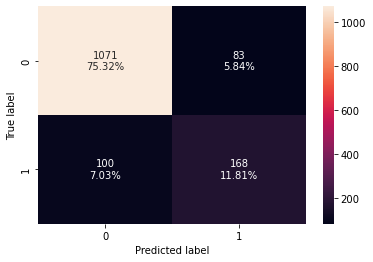

<IPython.core.display.Javascript object>

In [98]:
# Creating confusion matrix
confusion_matrix_sklearn(d_tree, X_test, y_test)

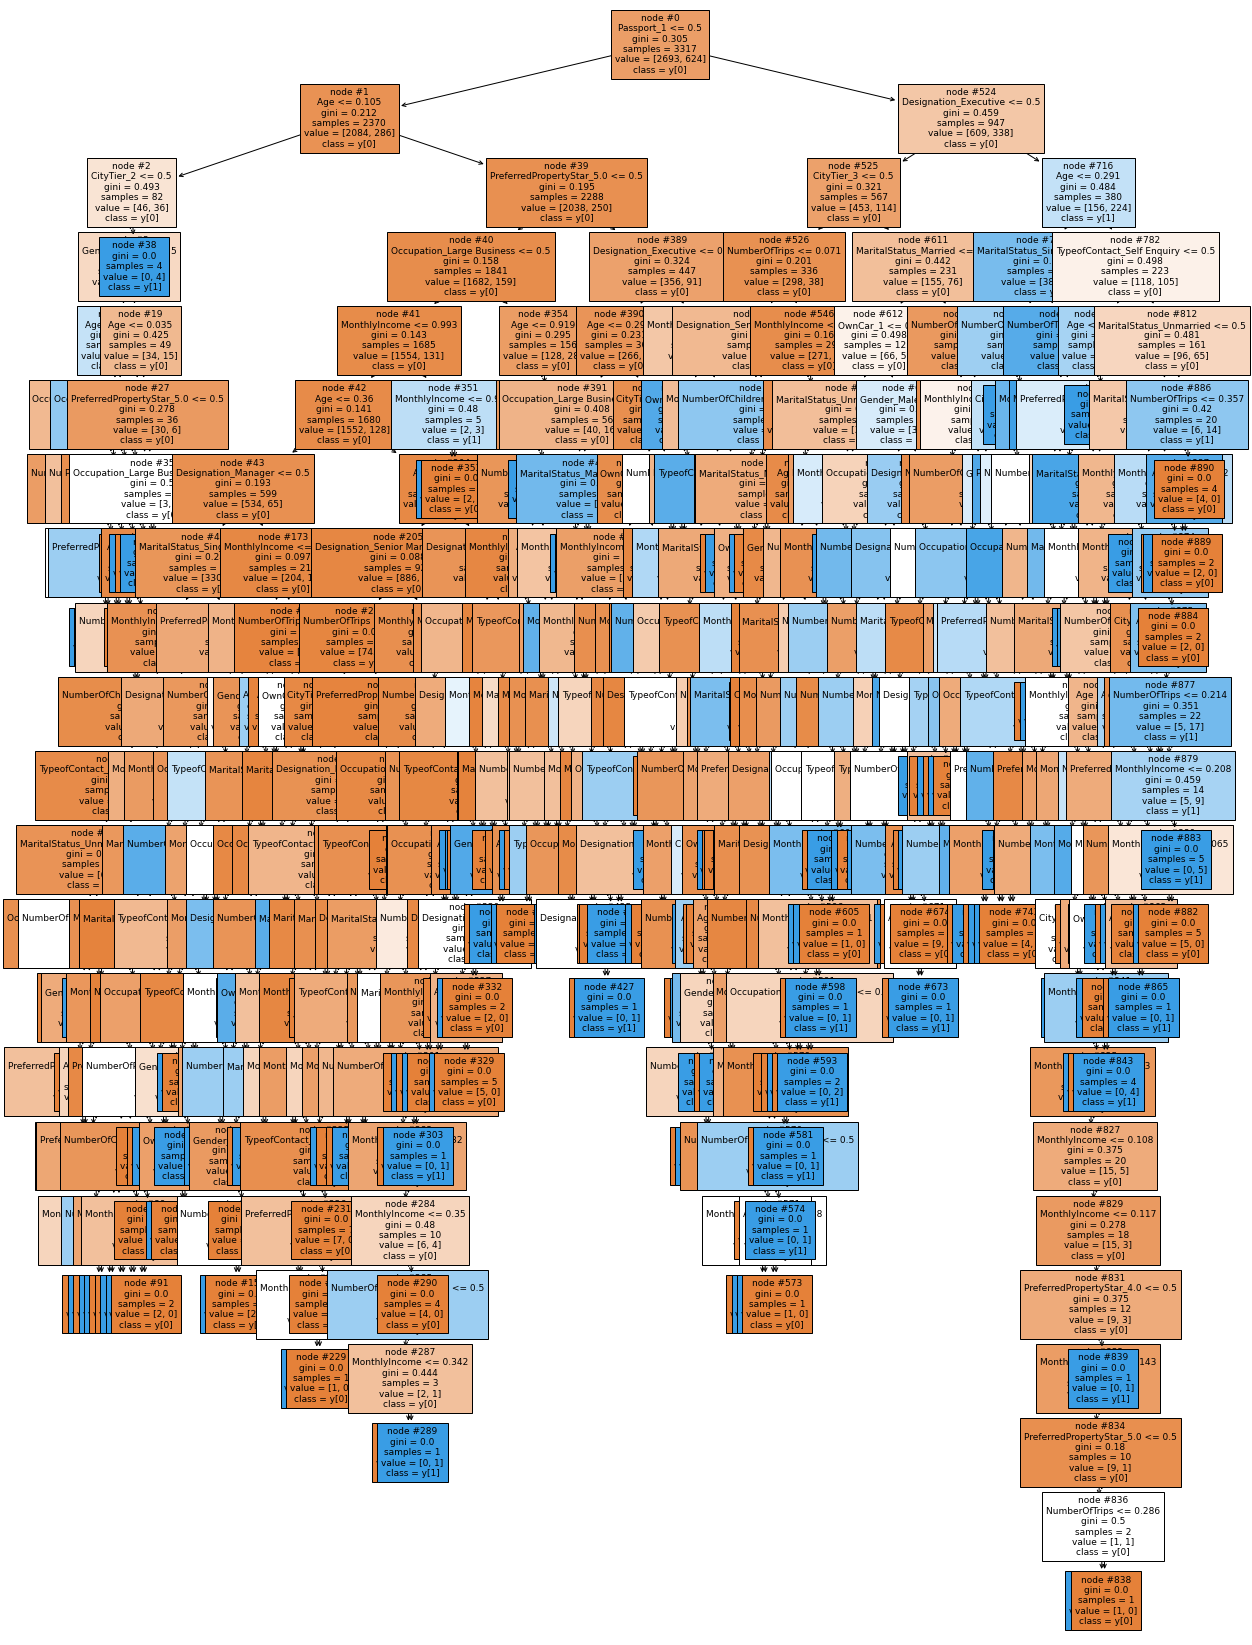

<IPython.core.display.Javascript object>

In [104]:
from sklearn import tree

# printing the decision tree in a graphical format using plot_tree from sklearn

plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    d_tree,
    feature_names=list(X.columns),
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

##### Obervations
1. The train set gave a recall of 100% against just 62% on test set. This model is underfitting and requires improvement. 
2. The tree is very complex and difficult to interpret.

#### Random Forest

In [105]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [106]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
print("Training performance")
rf_estimator_model_train_perf

Training performance


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

In [107]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
print("Testing performance:")
rf_estimator_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.873418,0.421642,0.818841,0.55665


<IPython.core.display.Javascript object>

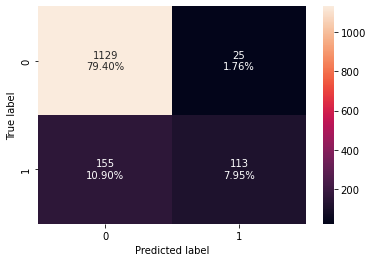

<IPython.core.display.Javascript object>

In [108]:
# Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

##### Observations
1. The recall on the test set is 42% against 100% on train set. This is also a poor model, in fact, worse than the default tree. We can try to improve this with tuning.

#### Bagging Classifier

In [109]:
# Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [110]:
# Calculating training performance
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)
print("Training performance:")
bagging_classifier_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.990654,0.955128,0.994992,0.974652


<IPython.core.display.Javascript object>

In [111]:
# Calculating test performance
bagging_classifier_model_test_perf = model_performance_classification_sklearn(
    bagging_classifier, X_test, y_test
)
print("Testing performance:")
bagging_classifier_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.869198,0.496269,0.722826,0.588496


<IPython.core.display.Javascript object>

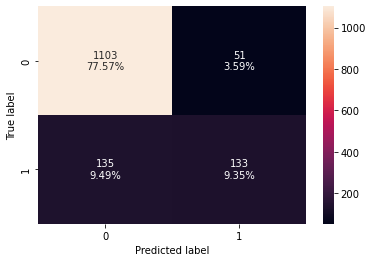

<IPython.core.display.Javascript object>

In [112]:
# Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

##### Observations
1. The default bagging classifier gave 95% recall on train and 50% on the test. We can tune this model to see if we get better results.

#### Tuning Decision Tree

In [113]:
# Choose the decision tree with inversed class weights
dtree_estimator = DecisionTreeClassifier(
    class_weight={0: 0.19, 1: 0.81}, random_state=1
)

# Grid of parameters to choose from
parameters = {
    "max_depth": (2, 6, 10, 12),
    "min_samples_leaf": [5, 7, 10, 15],
    "max_leaf_nodes": [2, 3, 5, 10, 15],
    "min_impurity_decrease": [0.0001, 0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=6,
                       max_leaf_nodes=10, min_impurity_decrease=0.0001,
                       min_samples_leaf=5, random_state=1)

<IPython.core.display.Javascript object>

In [114]:
# Calculating training performance
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    dtree_estimator, X_train, y_train
)
print("Training performance:")
dtree_estimator_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.806452,0.61859,0.488608,0.545969


<IPython.core.display.Javascript object>

In [115]:
# Calculating test performance
dtree_estimator_model_test_perf = model_performance_classification_sklearn(
    dtree_estimator, X_test, y_test
)
print("Testing performance:")
dtree_estimator_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.774965,0.570896,0.427374,0.488818


<IPython.core.display.Javascript object>

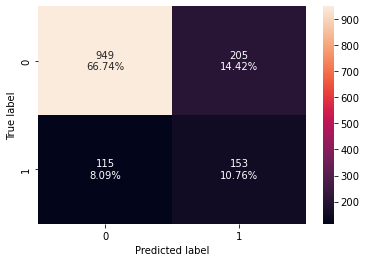

<IPython.core.display.Javascript object>

In [116]:
# Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

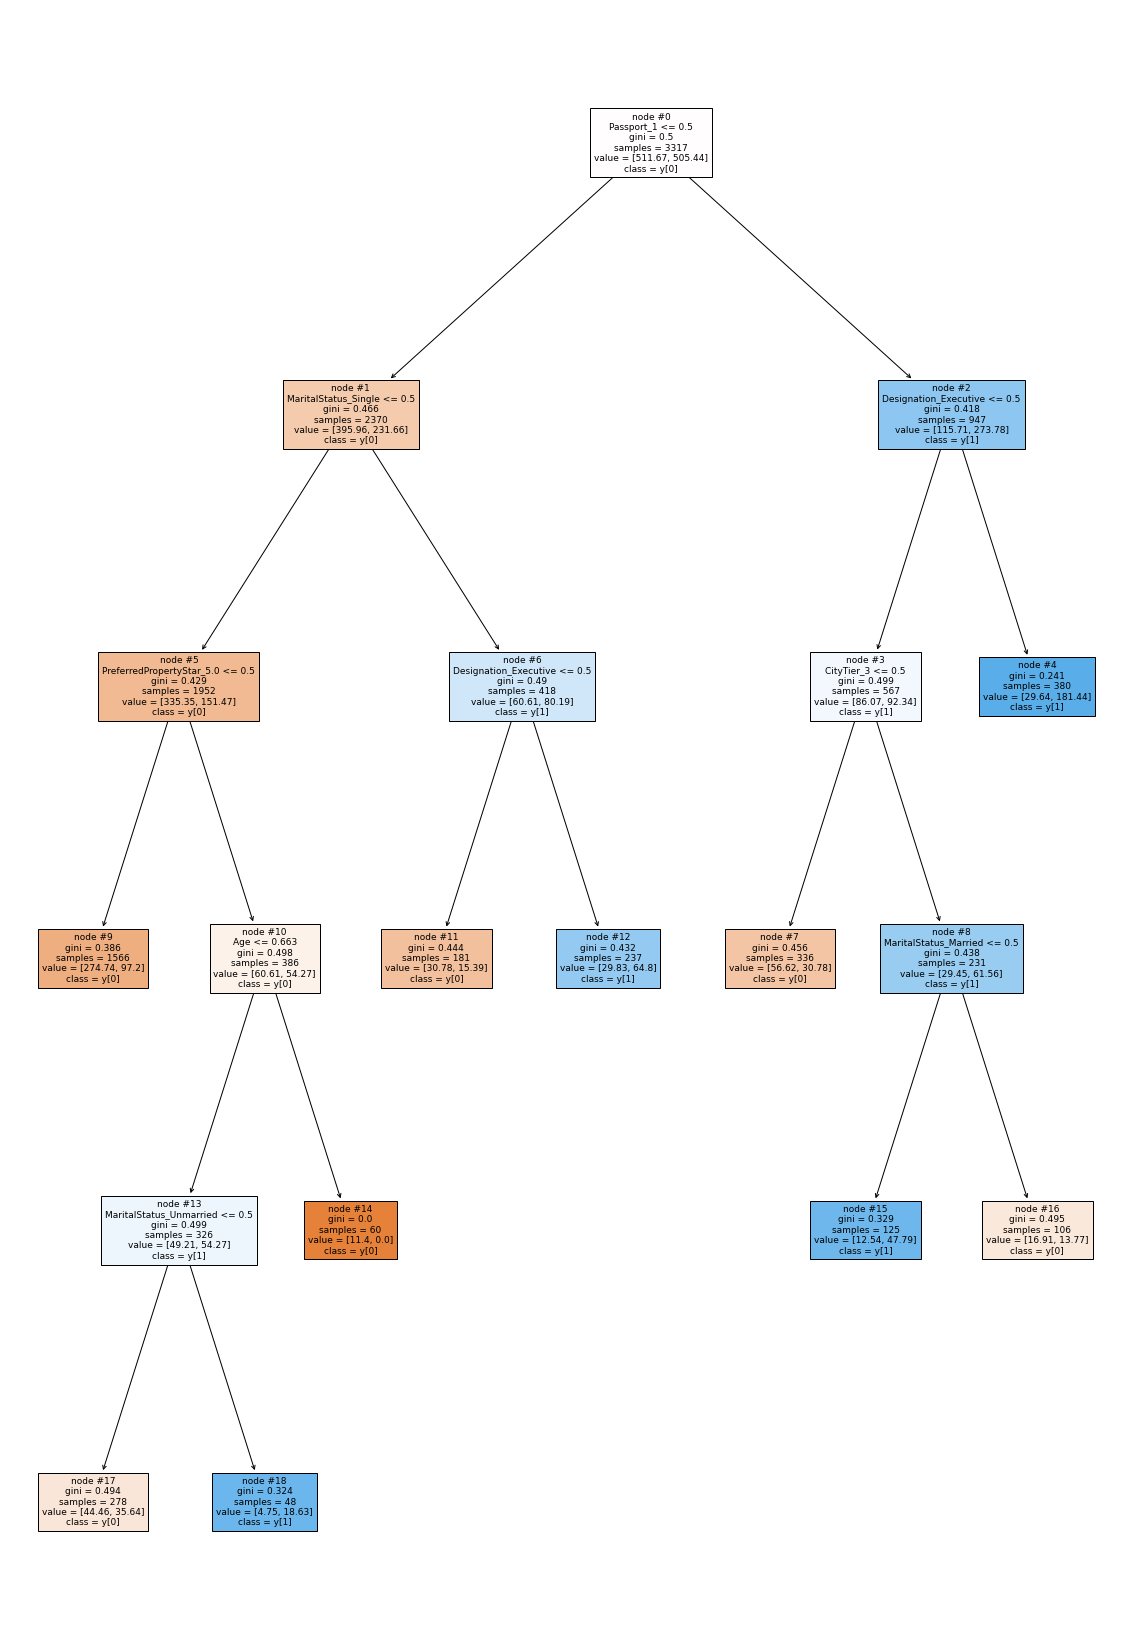

<IPython.core.display.Javascript object>

In [117]:
# printing the decision tree in a graphical format using plot_tree from sklearn

plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    dtree_estimator,
    feature_names=list(X.columns),
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

##### Observations
1. The tuned decision tree is very simple, has depth of 6 and is easy to interpret. 
2. However, the recall score on train is 61% and 57% on test. This is not a great score, and we can try to improvise this. 

#### Tuning Random Forest

Let's tune the Random Forest by inverse and balanced class weights.

In [118]:
# inversed class weights Random Forest Classifier
rf_tuned = RandomForestClassifier(
    class_weight={0: 0.19, 1: 0.81}, random_state=1, oob_score=True, bootstrap=True
)

parameters = {
    "max_depth": [4, 6, 8, 10, None],
    "max_features": ["sqrt", "log2", None],
    "n_estimators": [80, 90, 100, 110, 120],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=4,
                       max_features='sqrt', n_estimators=120, oob_score=True,
                       random_state=1)

<IPython.core.display.Javascript object>

In [119]:
# Calculating training performance
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)
print("Training performance:")
rf_tuned_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.807055,0.685897,0.490826,0.572193


<IPython.core.display.Javascript object>

In [120]:
# Calculating test performance
rf_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)
print("Testing performance:")
rf_tuned_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.774262,0.634328,0.43257,0.514372


<IPython.core.display.Javascript object>

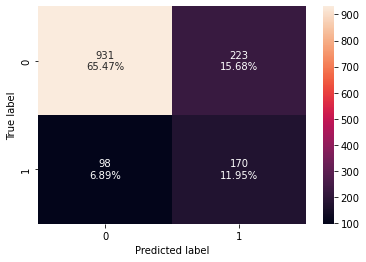

<IPython.core.display.Javascript object>

In [121]:
# Creating confusion matrix
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

##### Observations
1. The tuned random forest classifier with inverse class weights have a recall score of 68% and 63% on train and test respectively. 
2. The random forest has predicted 98 customers would not purchase, but actually did. This is a reduction from previous models. 

#### Tuning Bagging Classifier

Let's tune the bagging classifier also with inversed and balanced class weights

In [122]:
# inversed class weight bagging classifier.
bagging_estimator_tuned = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}),
    random_state=1,
)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "n_estimators": [10, 20, 30, 40, 50],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                      1: 0.81}),
                  max_features=1, max_samples=0.7, random_state=1)

<IPython.core.display.Javascript object>

In [123]:
# Calculating train performance
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print("Training performance:")
bagging_estimator_tuned_model_train_perf


Training performance:


,Accuracy,Recall,Precision,F1
0,0.593307,0.604167,0.254902,0.358535


<IPython.core.display.Javascript object>

In [124]:
# Calculating test performance
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, y_test
)
print("Testing performance:")
bagging_estimator_tuned_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.567511,0.548507,0.229329,0.323432


<IPython.core.display.Javascript object>

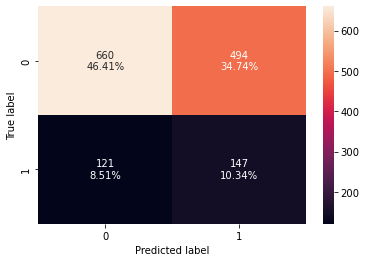

<IPython.core.display.Javascript object>

In [125]:
# Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

##### Observations
1. The tuned bagging classifer gave 60% and 55% on train and test data sets respectively. 

#### Bagging Model with Logistic Regression as base estimator

In [126]:
# chooseing Logistic Regression as the base estimator
bagging_lr = BaggingClassifier(
    base_estimator=LogisticRegression(solver="liblinear", random_state=1),
    random_state=1,
)
bagging_lr.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

<IPython.core.display.Javascript object>

In [127]:
# Calculating train performance
bagging_lr_model_train_perf = model_performance_classification_sklearn(
    bagging_lr, X_train, y_train
)
print("Training performance:")
bagging_lr_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.839916,0.278846,0.682353,0.395904


<IPython.core.display.Javascript object>

In [128]:
# Calculating test performance
bagging_lr_model_test_perf = model_performance_classification_sklearn(
    bagging_lr, X_test, y_test
)
print("Testing performance:")
bagging_lr_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.833333,0.242537,0.656566,0.354223


<IPython.core.display.Javascript object>

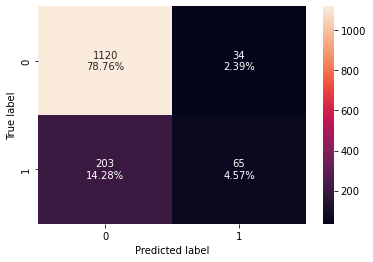

<IPython.core.display.Javascript object>

In [129]:
# Creating confusion matrix
confusion_matrix_sklearn(bagging_lr, X_test, y_test)

##### Observations
1. The bagging classifier with logistic regression as base estimator gave us really poor scores - just 28% and 24% recall on the train and test respectively. 


### Boosting - Model Building and Hyperparameter Tuning

#### AdaBoost Classifier

In [130]:
# Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [131]:
# Calculating train performance
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)
print("Training performance:")
ab_classifier_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.848055,0.307692,0.727273,0.432432


<IPython.core.display.Javascript object>

In [132]:
# Calculating test performance
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)
print("Testing performance:")
ab_classifier_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.838256,0.264925,0.682692,0.38172


<IPython.core.display.Javascript object>

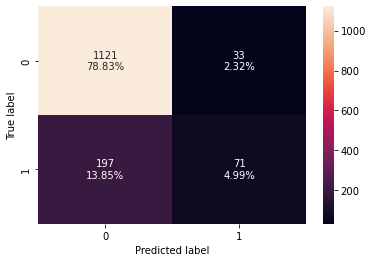

<IPython.core.display.Javascript object>

In [133]:
# Creating confusion matrix
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

##### Observations
1. The default AdaBoost Classifier has very poor performance. We have achieved only 30% and 26% recall scores on train and test respectively. 

#### Tuning AdaBoost Classifier

In [134]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=6, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=4, random_state=1),
        DecisionTreeClassifier(max_depth=5, random_state=1),
    ],
    "n_estimators": [10, 110, 10],
    "learning_rate": [0.001, 0.002, 0.003, 0.004, 0.005],
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6,
                                                         random_state=1),
                   learning_rate=0.004, n_estimators=110, random_state=1)

<IPython.core.display.Javascript object>

In [135]:
# Calculating train performance
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)
print("Training performance:")
abc_tuned_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.924028,0.628205,0.951456,0.756757


<IPython.core.display.Javascript object>

In [136]:
# Calculating test performance
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)
print("Testing performance:")
abc_tuned_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.855837,0.440299,0.682081,0.535147


<IPython.core.display.Javascript object>

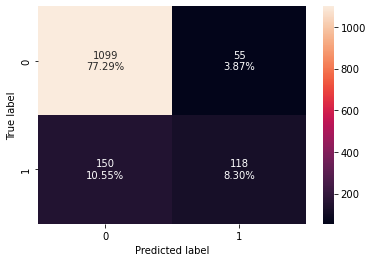

<IPython.core.display.Javascript object>

In [137]:
# Creating confusion matrix
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

##### Observations
1. Performance of the tuned adaboost classifier has improved from the default classifier
2. However, the scores are still not good to consider it as a good model - 63% and 45% recall on train and test. 

### Gradient Boosting Classifier

In [138]:
# Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [139]:
# Calculating train performance
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)
print("Training performance:")
gb_classifier_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.884836,0.474359,0.845714,0.607803


<IPython.core.display.Javascript object>

In [140]:
# Calculating test performance
gb_classifier_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)
print("Testing performance:")
gb_classifier_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.850211,0.373134,0.689655,0.484262


<IPython.core.display.Javascript object>

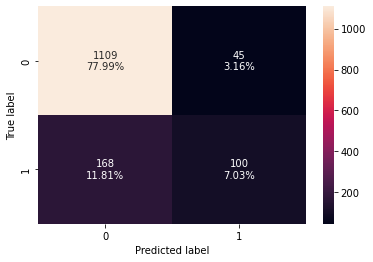

<IPython.core.display.Javascript object>

In [141]:
# Creating confusion matrix
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

##### Observations
1. Performance of the default gradient boosting classifier is not spectacular- just 47% and 37% on train and test. We should try to improve this with tuning.

#### Tuning Gradient Boosting Classifier

In [142]:
# we can tune the gradient boosting classifier by initializing with AdaBoost Classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [20, 30, 50],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.5, 0.7, 1],
    "learning_rate": [0.001, 0.004, 0.005],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.004, max_features=0.7,
                           n_estimators=20, random_state=1, subsample=1)

<IPython.core.display.Javascript object>

In [143]:
# Calculating train performance
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
print("Training performance:")
gbc_tuned_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.845342,0.315705,0.696113,0.434399


<IPython.core.display.Javascript object>

In [144]:
# Calculating test performance
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
print("Testing performance:")
gbc_tuned_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.83052,0.264925,0.617391,0.370757


<IPython.core.display.Javascript object>

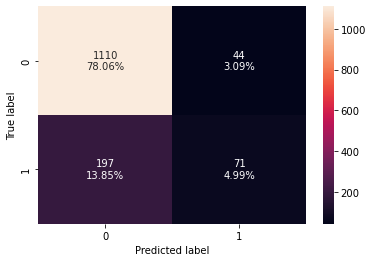

<IPython.core.display.Javascript object>

In [145]:
# Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

##### Observations
1. The tuned gradient boosting classifier was initialized with AdaBoost Classifier
2. The performance on this model is extremely poor -30% and 25% recall on train and test sets.

### XGBoost Classifier

In [146]:
# Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

<IPython.core.display.Javascript object>

In [147]:
# Calculating train performance
xgb_classifier_model_train_perf = model_performance_classification_sklearn(
    xgb_classifier, X_train, y_train
)
print("Training performance:")
xgb_classifier_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.995779,0.977564,1.0,0.988655


<IPython.core.display.Javascript object>

In [148]:
# Calculating test performance
xgb_classifier_model_test_perf = model_performance_classification_sklearn(
    xgb_classifier, X_test, y_test
)
print("Testing performance:")
xgb_classifier_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.892405,0.574627,0.797927,0.668113


<IPython.core.display.Javascript object>

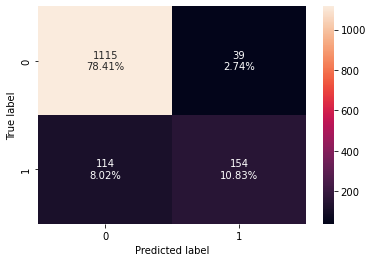

<IPython.core.display.Javascript object>

In [149]:
# Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

##### Observations
1. The default XGBoost classifier gave 98% on the train set but only 58% on the test set. This is an underfitting model, however, we can try to tune the XGBoost classifier and see if it can yield any improvement.

#### Tuned XGBoost Classifier

In [150]:
# choose the type of classifier
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss", tree_method="hist")

# Grid of parameters to choose from
parameters = {
    "n_estimators": [20, 30, 40, 50, 100],
    "learning_rate": [0.001, 0.002, 0.003, 0.004, 0.005],
    "scale_pos_weight": [5],
    "subsample": [0.7, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.004, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

<IPython.core.display.Javascript object>

In [151]:
# Calculating train performance
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
print("Training performance:")
xgb_tuned_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.828158,0.783654,0.529221,0.631783


<IPython.core.display.Javascript object>

In [152]:
# Calculating test performance
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
print("Testing performance:")
xgb_tuned_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.770745,0.664179,0.429952,0.521994


<IPython.core.display.Javascript object>

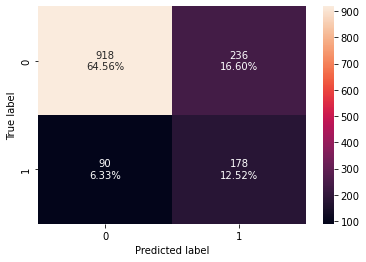

<IPython.core.display.Javascript object>

In [153]:
# Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

##### Observations
1. There is significant improvement on the recall scores in the tuned xgboost - 78% and 67% on train and test. However, the differences are really huge, and the model is underfitting.

#### Stacking Classifier

In [154]:
# choose the base estimators
estimators = [
    ("Random Forest", rf_tuned),
    ("Gradient Boosting", gbc_tuned),
    ("Decision Tree", dtree_estimator),
    ("AdaBoost", abc_tuned),
]

# choose the final estimator
final_estimator = xgb_classifier

stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

# fitting the model
stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.19,
                                                                     1: 0.81},
                                                       max_depth=4,
                                                       max_features='sqrt',
                                                       n_estimators=120,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           learning_rate=0.004,
                                                           max_features=0.7,
                                                           n_estimators=20,
                                               

<IPython.core.display.Javascript object>

In [155]:
# Calculating train performance
stacking_classifier_model_train_perf = model_performance_classification_sklearn(
    stacking_classifier, X_train, y_train
)
print("Training performance:")
stacking_classifier_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.89388,0.588141,0.794372,0.675875


<IPython.core.display.Javascript object>

In [156]:
# Calculating test performance
stacking_classifier_model_test_perf = model_performance_classification_sklearn(
    stacking_classifier, X_test, y_test
)
print("Testing performance:")
stacking_classifier_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.847398,0.451493,0.633508,0.527233


<IPython.core.display.Javascript object>

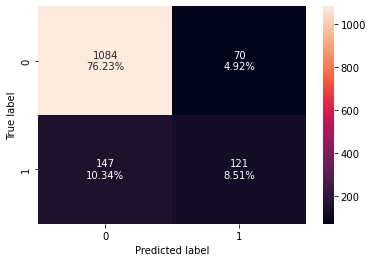

<IPython.core.display.Javascript object>

In [157]:
# Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

### Comparison of models

In the next session, we will compile and consolidate the performances of each model, in order to compare them against another. 

In [158]:
# consolidate performances of all train datasets into one dataframe

models_train_comp_df = pd.concat(
    [
        dtree_model_train_perf.T,
        dtree_estimator_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        bagging_lr_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned-Inverse",
    "Bagging Classifier",
    "Bagging Estimator Tuned-Inverse",
    "Bagging Classifier-LogReg",
    "Adaboost Classifier",
    "Adaboost Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned-Inverse,Bagging Classifier,Bagging Estimator Tuned-Inverse,Bagging Classifier-LogReg,Adaboost Classifier,Adaboost Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.806452,1.0,0.807055,0.990654,0.593307,0.839916,0.848055,0.924028,0.884836,0.845342,0.995779,0.828158,0.893880
Recall,1.0,0.618590,1.0,0.685897,0.955128,0.604167,0.278846,0.307692,0.628205,0.474359,0.315705,0.977564,0.783654,0.588141
Precision,1.0,0.488608,1.0,0.490826,0.994992,0.254902,0.682353,0.727273,0.951456,0.845714,0.696113,1.000000,0.529221,0.794372
F1,1.0,0.545969,1.0,0.572193,0.974652,0.358535,0.395904,0.432432,0.756757,0.607803,0.434399,0.988655,0.631783,0.675875


<IPython.core.display.Javascript object>

In [159]:
# consolidate performances of all test datasets into one dataframe

models_test_comp_df = pd.concat(
    [
        dtree_model_test_perf.T,
        dtree_estimator_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        bagging_lr_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned-Inverse",
    "Bagging Classifier",
    "Bagging Estimator Tuned-Inverse",
    "Bagging Classifier-LogReg",
    "Adaboost Classifier",
    "Adaboost Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]


print("Testing performance comparison:")

models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned-Inverse,Bagging Classifier,Bagging Estimator Tuned-Inverse,Bagging Classifier-LogReg,Adaboost Classifier,Adaboost Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.871308,0.774965,0.873418,0.774262,0.869198,0.567511,0.833333,0.838256,0.855837,0.850211,0.830520,0.892405,0.770745,0.847398
Recall,0.626866,0.570896,0.421642,0.634328,0.496269,0.548507,0.242537,0.264925,0.440299,0.373134,0.264925,0.574627,0.664179,0.451493
Precision,0.669323,0.427374,0.818841,0.432570,0.722826,0.229329,0.656566,0.682692,0.682081,0.689655,0.617391,0.797927,0.429952,0.633508
F1,0.647399,0.488818,0.556650,0.514372,0.588496,0.323432,0.354223,0.381720,0.535147,0.484262,0.370757,0.668113,0.521994,0.527233


<IPython.core.display.Javascript object>

In [160]:
# bring the test and train dataframes into a single dataframe to do side by side comparison

# rename the columns of the train dataset and transpose
models_train_comp_df = models_train_comp_df.rename(
    index={
        "Accuracy": "Accuracy_train",
        "Recall": "Recall_train",
        "Precision": "Precision_train",
        "F1": "F1_train",
    }
)
models_train_comp_df = models_train_comp_df.T

# rename the columns of the test dataset and transpose
models_test_comp_df = models_test_comp_df.rename(
    index={
        "Accuracy": "Accuracy_test",
        "Recall": "Recall_test",
        "Precision": "Precision_test",
        "F1": "F1_test",
    }
)

models_test_comp_df = models_test_comp_df.T


# concatenate both the above datasets into a single one.
final_model_comp = pd.concat([models_train_comp_df, models_test_comp_df], axis=1)
final_model_comp = final_model_comp[
    [
        "Accuracy_train",
        "Accuracy_test",
        "Recall_train",
        "Recall_test",
        "Precision_train",
        "Precision_test",
        "F1_train",
        "F1_test",
    ]
]
final_model_comp

,Accuracy_train,Accuracy_test,Recall_train,Recall_test,Precision_train,Precision_test,F1_train,F1_test
Decision Tree,1.000000,0.871308,1.000000,0.626866,1.000000,0.669323,1.000000,0.647399
Decision Tree Estimator,0.806452,0.774965,0.618590,0.570896,0.488608,0.427374,0.545969,0.488818
Random Forest Estimator,1.000000,0.873418,1.000000,0.421642,1.000000,0.818841,1.000000,0.556650
Random Forest Tuned-Inverse,0.807055,0.774262,0.685897,0.634328,0.490826,0.432570,0.572193,0.514372
Bagging Classifier,0.990654,0.869198,0.955128,0.496269,0.994992,0.722826,0.974652,0.588496
Bagging Estimator Tuned-Inverse,0.593307,0.567511,0.604167,0.548507,0.254902,0.229329,0.358535,0.323432
Bagging Classifier-LogReg,0.839916,0.833333,0.278846,0.242537,0.682353,0.656566,0.395904,0.354223
Adaboost Classifier,0.848055,0.838256,0.307692,0.264925,0.727273,0.682692,0.432432,0.381720
Adaboost Classifier Tuned,0.924028,0.855837,0.628205,0.440299,0.951456,0.682081,0.756757,0.535147
Gradient Boost Classifier,0.884836,0.850211,0.474359,0.373134,0.845714,0.689655,0.607803,0.484262


<IPython.core.display.Javascript object>

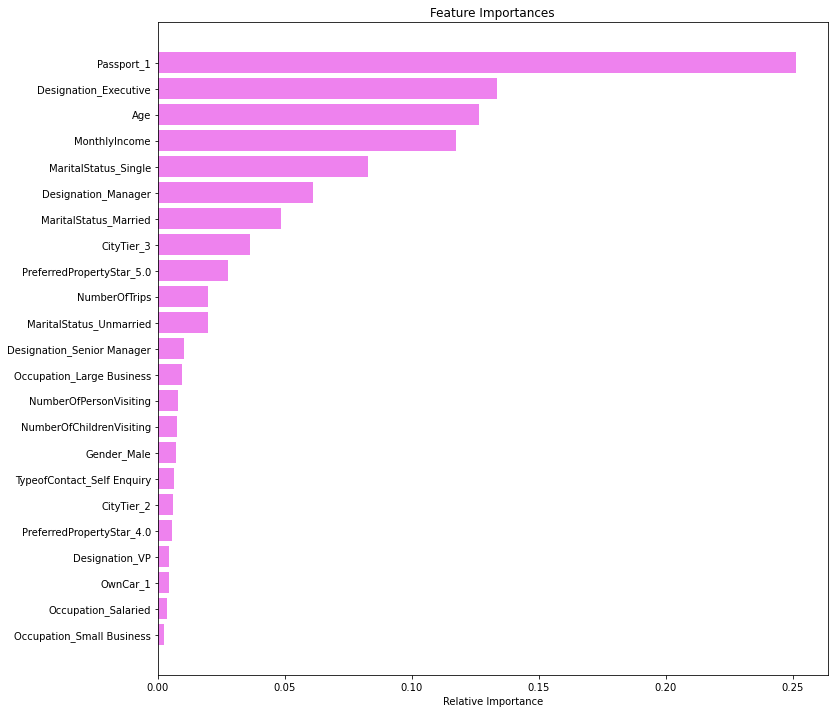

<IPython.core.display.Javascript object>

In [161]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

##### <span style="color:green">Observations</span>

1. We trained 14 models using decision trees and ensemble techniques. Out of these 14 models, Random Forest tuned with inverse class weights gave us an excellent recall score. 
2. The parameters of the random forest that gave us good score are as below:
    - class_weight={0: 0.19, 1: 0.81}, 
    - max_depth=4,
    - max_features='sqrt', 
    - n_estimators=120, 
    - oob_score=True,
    - random_state=1
3. According to this model, Passport, Designation, Age and Monthly Income are the 4 most important parameters.

### <span style="color:purple">Summary and Conclusions</span>

We have extensively analysed the data and built several models based on ensemble techniques. Before we make recommendations on which model to use, let us look at a summary of the work we've done.

### <span style="color:purple">Summary of Data</span>

1. The original dataset had 4888 rows and 20 columns, including the variable of interest. 
2. There were 8 columns with missing values and 141 duplicated rows. 
3. From the dataset, the variables can be categorized in the following manner

Numerical
- Age (interval)
- DurationOfPitch (interval)
- MonthlyIncome (interval)
- NumberOfTrips
- NumberOfFollowups
- NumberOfPersonVisiting
- PitchSatisfactionScore
- NumberOfChildrenVisiting

Categorical
- TypeofContact
- CityTier
- Occupation
- Gender
- ProductPitched
- PreferredPropertyStar
- MaritalStatus
- Passport
- OwnCar
- Designation
- ProdTaken

### <span style="color:purple">Summary of Data Treatments</span>
1. There were 141 rows which were duplicated. After careful verification, these rows were dropped. 
2. The column, Customer ID, was dropped off. 
3. There were missing values in the following columns.
    - DurationOfPitch (float64)
    - MonthlyIncome (float64)              
    - Age (float64)                         
    - NumberOfTrips (float64)              
    - NumberOfChildrenVisiting (float64)    
    - NumberOfFollowups (float64)         
    - PreferredPropertyStar (float64)        
    - TypeofContact (object)
4. Where possible, missing values for numerical columns were imputed with the median. For categorical columns, they were imputed with mode of the column.
5. There were typo errors in the column Gender, which were corrected. 
6. The following columns were converted to categorical type:
    - TypeOfContact
    - Occupation
    - Gender
    - ProductPitched
    - PreferredPropertyStar
    - MaritalStatus
    - Passport
    - Designation
    - OwnCar
    - ProdTaken
7. There were outliers in the Monthly Income and Number of Trips columns. These outliers were mostly retained as actual values, but very extreme values had to be dropped off. 
8. Since Age, Number of Persons Visiting, Monthly Income, Number of Trips, Number of Children Visiting, were on different scales and had skewed distributions, MinMax scaling was performed to achieve unique scales. 
9. At the end of all treatments, the dataset contained 4739 rows for modeling. 

### <span style="color:purple">Key Observations from EDA</span>

1. Mean age of the customer dataset is 38 years, with 50% falling below 36 years. Ages range from 18 to 61.
2. Self Enquiry is the most frequent way of contacting the company.
3. Duration of Pitch ranges from 5 hours to 127 hours.
4. Most of the customers are Salaried, Male and Married.
5. Trips can have a max of 5 people and upto 3 children.
6. Average gross monthly income is close to 23,500, ranging from 1000 to 98,678.
7. Most customers in the dataset fall in the 30-45 age set (around 2700), followed by those in 15-30 dataset (1098). This is understandable, as millenials have a more favourable attitude and financial situation towards travelling than Gen X or baby boomers.
8. Most of the customers fall in the 20K-60K income set (3729), followed by 10K-20K (1014). 
9. Most customers are from a Top Tier city (3098 customers), followed by Tier 3 (1461) and only a very small percentage from Tier 2.
10. The median Age of customers who purchased a product is 32 years.
11. The median income of customers who purchased a product is 20,000, ranging from 18,000 to 35,000.
12. Customers who purchased a product are likely to 3 trips in a year on an average.
13. Most customers need 3-5 follow-ups, and have a regular or short pitch.
14. Most customers have 2-4 persons in the trip, and mostly atleast 1 child included.
15. Customers who purchase a product are mostly male, married, own their car and passport and are mostly executives.
16. Most customers purchase basic products followed by Deluxe products.
17. MonthlyIncome has a strong correlation with Age. 
18. NumberOfChildrenVisiting has a high correlation with NumberOfPersonVisiting.



### <span style="color:purple">Data Preparation: Outlier Treatments and Scaling</span>

1. There were outliers in the Monthly Income and Number of Trips columns. These outliers were mostly retained as actual values, but very extreme values had to be dropped off.
2. Since Age, Number of Persons Visiting, Monthly Income, Number of Trips, Number of Children Visiting, were on different scales and had skewed distributions, MinMax scaling was performed to achieve unique scales.
3. Categorical columns were dummy encoded. 
4. At the end of all treatments, the dataset contained 4739 rows for modeling.

### <span style="color:purple">Model Evaluation Criteria</span>

When a tourism company like Visit With Us wants to attract more customers, our prediction model should be able to correctly predict actual customers. Missing out on potential customers can result in opportunity loss and loss of revenue. Therefore we evaluated our models on the objective of reducing false negatives as much as possible. Therefore, the model's objective was to have good recall scores. 

### <span style="color:purple">Summary of model building</span>

1. Data Split: The dataset was split into train and test sets in the ratio 70:30. 
2. Class Imbalance: The two classes were in the ratio 19:81, with the data imbalanced towards the 0 classes. The test and train sets maintained the same ratio of classes.

We built 14 models, which are the following:

1. Default Decision Tree
2. Tuned Decision Tree 
    - best parameters:: class_weight={0: 0.19, 1: 0.81}, max_depth=6, max_leaf_nodes=10, min_impurity_decrease=0.0001,           min_samples_leaf=5, random_state=1
3. Default Random Forest 
4. Random Forest with inversed class weights
    - best parameters:: class_weight={0: 0.19, 1: 0.81}, max_depth=4,max_features='sqrt', n_estimators=120, oob_score=True,                   random_state=1
5. Default Bagging Classifier
6. Bagging Classifier with inversed class weights
    - best parameters:: base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,1: 0.81}), max_features=1, max_samples=0.7, random_state=1
7. Bagging Classifier with logistic regression as the base estimator
8. Default AdaBoost Classifier
9. Tuned AdaBoost Classifier
    - best parameters:: base_estimator=DecisionTreeClassifier(max_depth=6, random_state=1), learning_rate=2, n_estimators=10, random_state=1
10. Default Gradient Boost Classifier
11. Tuned Gradient Boost Classifier
    - best parameters:: init=AdaBoostClassifier(random_state=1),learning_rate=0.001, max_features=0.7,n_estimators=50, random_state=1, subsample=1
12. XG Boost Classifier
13. Tuned XG Boost Classifier
    - best parameters:: eval_metric='logloss',learning_rate=0.004, n_estimators=100, random_state=1, etc.
14. Stacking Classifier
    - with initial estimators as random forest, gradient boosting and decision trees

### <span style="color:purple">Recommended Model</span>

The model that gave us best results was the **tuned Random Forest with inverse class weights**. 
- This model gave us 68% recall on the train set and 65% on the test set. 
- According to this model, Passport, Designation, Age and Monthly Income are the 4 most important parameters.
- In our pursuit to increase recall, we have also not compromised on precision in this model. This means, while the focus is to identify correctly as many potential customers as we can, we are also not increasing too many cases where non-customers are predicted as customers. 

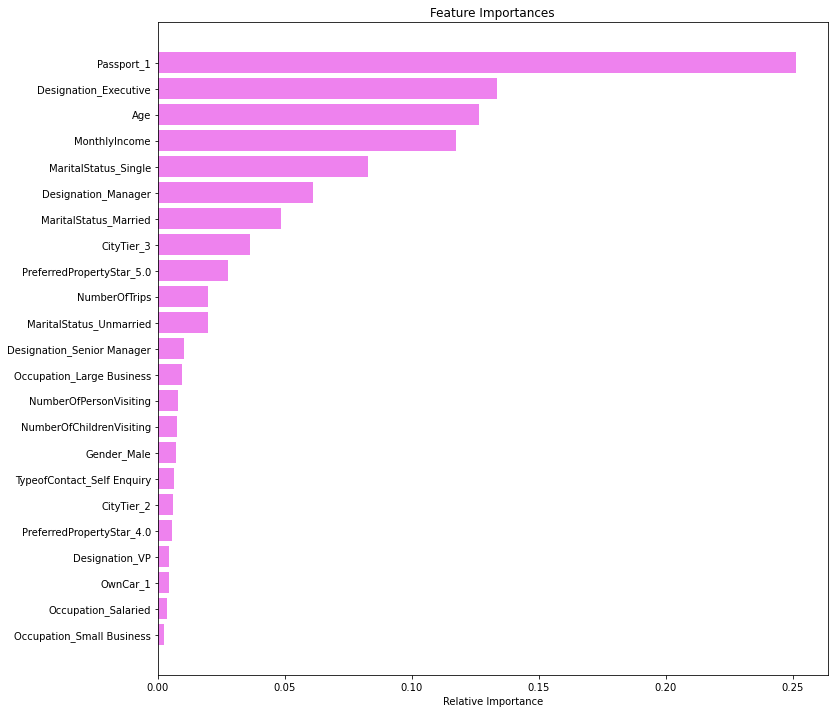

<IPython.core.display.Javascript object>

In [162]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### <span style="color:purple">False Positive and Negative Analysis</span>

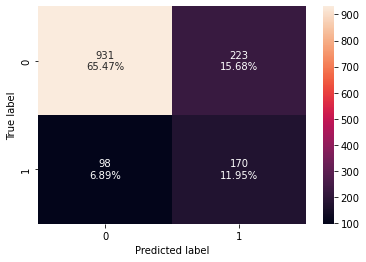

<IPython.core.display.Javascript object>

In [163]:
# Creating confusion matrix
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

True Positives (TP): the model correctly predicted 170 customers will purchase products from the company

True Negatives (TN): the model correctly predicted that 931 customers will not purchase products from the company

False Positives (FP): the model incorrectly predicted that 223 customers will purchase products from the company (a "Type I error")

False Negatives (FN): the model incorrectly predicted that 98 customers will not purchase products from the company (a "Type II error")

### <span style="color:purple">Actionable Insights and Recommendations</span>

1. The primary target group of the company should be:
    - Male
    - Married
    - Salaried Executives
    - Age group 15-40
    - Income 18K to 35K
    - Owns a car
    - Has a passport
    - Groups of 2 or 3, may include a child or two.
    - Comes from Tier 1 cities
    
2. Basic is the most popular product, followed by Deluxe, then Standard, King and Super Deluxe respectively. Therefore Basic and Deluxe should be marketed as entry level packages with affordable and attractive facilities.
3. Enquiries for Super Deluxe were initiated by the company, so this can be marketed as an  Invite Only package for loyal customers. This can instil a sense of pride in the customers and result in repeated engagement. 
4. Since most customers have a passport, it is reasonable to have a good balance of international and domestic packages to attract the customers. Also, it would be reasonable to open passport application services for customers, as an additional line of business.
5. Most of the customers who purchased a product prefer to stay in a property which 3 star rating or more. 
6. In order to attract more female customers, offer safe visiting options, like a group tours for just women. 
7. When it comes to delivering sales pitches to the customers, the company should focus on delivering pitches that are upto 50 hours and can be concluded within 3-4 followups. 
8. As to our models, we have seen that model performances are limited to around 60-70% in test and train datasets. One of the things we can do to improve our models is to collect better quality data, which could include:
    - Seasons of travel
    - Preferences such as food, activities, nature of trip (historical tours vs adventures)
    - Annual budget allocated to travel and any others. 

#### Customer Profile for each product

##### <span style="color:green">Basic</span>
1. Demographic profile: They mostly come from Tier 1 cities, are salaried. They are mostly male customers, single or married, own a passport and a car and are of executive designation. They prefer to contact the company on their own for their travel needs. These customers are mostly in the 15-45 age group and in the income bracket 10K to 40K.
2. Trip Profile: Basic products are purchased by people who prefer to travel in small groups, mostly 3, followed by 2. Most of these customer take less than 5 trips a year and some between 5-10. Mostly there is 1 child travelling in the group, but it can range anywhere from 0 to 5. Customers who purchased Basic Products mostly indicated a preferred property star of 3, followed by 5.


##### <span style="color:green">Deluxe</span>
1. Demographic profile: They mostly come from Tier 3 cities, are from small businesses. They are mostly male customers, married, may or may not own a passport, but owns a car and are of managerial designation. They prefer to contact the company on their own for their travel needs. They are mostly in the 17K to 40K income range and 21 to 60 years.
2. Trip Profile: Mostly 3 person groups, taking less than 5 trips a year, with few customers taking upto 10 trips a year. Children in the group can be anywhere from 0 to 3, but mostly just 1. Customers who purchased Deluxe also indicated a property preference of star rating 3.

##### <span style="color:green">King</span>
1. Demographic profile: They can come from Tier 1 and Tier 3 cities and are from small businesses. They are mostly female customers who are single, may or may not own a passport, but owns a car and are of managerial designation. They prefer to contact the company on their own for their travel needs. They are also in the same income range as Deluxe customers, but slightly older - 27 to 60 years.
2. Trip Profile:Mostly 3 person groups, taking less than 5 trips a year. Children in the group can be anywhere from 0 to 3, but mostly just 1.These customers showed almost equal preference for properties with star rating 3 or 5. 

##### <span style="color:green">Standard</span>
1. Demographic profile: They mostly come from Tier 3 cities, but can also be from Tier 1 cities and are from small businesses. They are mostly male customers, married, don't own a passport but have a car and are Senior Managers. They prefer to contact the company on their own for their travel needs. They are in almost the same income and age range as Deluxe customers.
2. Trip Profile:Mostly 3 person groups, taking less than 5 trips a year. Children in the group can be anywhere from 0 to 3, but mostly just 1. These customers showed a high preference for properties with star rating 3.

##### <span style="color:green">Super Deluxe</span>
1. Demographic profile: They mostly come from Tier 3 cities, and are salaried. They are mostly male customers, single, may or could own a passport, but owns a car and are of AVP designation. Their travel enquiries are company invited. These customers belong to a smaller age and income group - 39 to 56 years and 20K to 40K incomes.
2. Trip Profile: These customers are mostly 3 person groups, taking less than 5 trips a year. Children in the group can be anywhere from 0 to 2, but mostly just 1. Customers who purchased Super Deluxe products were few, but showed a clear preference for properties with star rating 3.


Note: Interaction parameters are more or less same across the products. Most products have a pitch duration of short to regular. Customer satisfaction for products are mostly average, but they can be anywhere from 1-5. Most products require 3-4 followups, except for Super Deluxe which requires only 1-2. 
